In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [356]:
df1=pd.read_excel('/content/Telco_customer_churn.xlsx')
df2=pd.read_excel('/content/Telco_customer_churn_demographics.xlsx')
df3=pd.read_excel('/content/Telco_customer_churn_location.xlsx')
df4=pd.read_excel('/content/Telco_customer_churn_population.xlsx')
df5=pd.read_excel('/content/Telco_customer_churn_services.xlsx')
df6=pd.read_excel('/content/Telco_customer_churn_status.xlsx')

In [357]:
df1.head()

CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason  
0         Yes            1           86  3239   Competitor made better offer  
1         Yes            1           67  2701                          Moved  
2         Yes            1           86  5372                          Moved  
3         Yes            1           84  5003                          Moved  
4         Yes            1           89  5340  Competitor had better devices

In [358]:
df1.columns=['Customer ID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason']

In [359]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)

(7043, 33)
(7043, 9)
(7043, 9)
(1671, 3)
(7043, 30)
(7043, 11)


In [360]:
df2.head()

Customer ID  Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV      1    Male   78       No            Yes      No         No   
1  7495-OOKFY      1  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY      1    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ      1  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ      1  Female   80       No            Yes     Yes        Yes   

   Number of Dependents  
0                     0  
1                     1  
2                     3  
3                     1  
4                     1

In [361]:
df2.join(df1.set_index('Customer ID'),on='Customer ID',lsuffix='_left', rsuffix='_right')

Customer ID  Count_left Gender_left  Age Under 30 Senior Citizen_left  \
0     8779-QRDMV           1        Male   78       No                 Yes   
1     7495-OOKFY           1      Female   74       No                 Yes   
2     1658-BYGOY           1        Male   71       No                 Yes   
3     4598-XLKNJ           1      Female   78       No                 Yes   
4     4846-WHAFZ           1      Female   80       No                 Yes   
...          ...         ...         ...  ...      ...                 ...   
7038  2569-WGERO           1      Female   30       No                  No   
7039  6840-RESVB           1        Male   38       No                  No   
7040  2234-XADUH           1      Female   30       No                  No   
7041  4801-JZAZL           1      Female   32       No                  No   
7042  3186-AJIEK           1        Male   44       No                  No   

     Married Dependents_left  Number of Dependents  Count_right  \
0         No              No                     0            1   
1        Yes             Yes                     1            1   
2         No             Yes                     3            1   
3        Yes             Yes                     1            1   
4        Yes             Yes                     1            1   
...      ...             ...                   ...          ...   
7038      No              No                     0            1   
7039     Yes             Yes                     2            1   
7040     Yes             Yes                     2            1   
7041     Yes             Yes                     2            1   
7042      No              No                     0            1   

            Country       State          City  Zip Code  \
0     United States  California   Los Angeles     90022   
1     United States  California   Los Angeles     90063   
2     United States  California   Los Angeles     90065   
3     United States  California     Inglewood     90303   
4     United States  California      Whittier     90602   
...             ...         ...           ...       ...   
7038  United States  California       Landers     92285   
7039  United States  California      Adelanto     92301   
7040  United States  California         Amboy     92304   
7041  United States  California  Angelus Oaks     92305   
7042  United States  California  Apple Valley     92308   

                    Lat Long   Latitude   Longitude Gender_right  \
0      34.02381, -118.156582  34.023810 -118.156582         Male   
1     34.044271, -118.185237  34.044271 -118.185237       Female   
2     34.108833, -118.229715  34.108833 -118.229715         Male   
3     33.936291, -118.332639  33.936291 -118.332639       Female   
4     33.972119, -118.020188  33.972119 -118.020188       Female   
...                      ...        ...         ...          ...   
7038  34.341737, -116.539416  34.341737 -116.539416       Female   
7039  34.667815, -117.536183  34.667815 -117.536183         Male   
7040  34.559882, -115.637164  34.559882 -115.637164       Female   
7041     34.1678, -116.86433  34.167800 -116.864330       Female   
7042  34.424926, -117.184503  34.424926 -117.184503         Male   

     Senior Citizen_right Partner Dependents_right  Tenure Months  \
0                     Yes      No               No              1   
1                     Yes     Yes              Yes              8   
2                     Yes      No              Yes             18   
3                     Yes     Yes              Yes             25   
4                     Yes     Yes              Yes             37   
...                   ...     ...              ...            ...   
7038                   No      No               No             72   
7039                   No     Yes              Yes             24   
7040                   No     Yes              Yes             72   
7041                   No     Yes              

In [362]:
merged=pd.merge(df1,df3,on='Customer ID')

In [363]:
df3.head()

Customer ID  Count        Country       State         City  Zip Code  \
0  8779-QRDMV      1  United States  California  Los Angeles     90022   
1  7495-OOKFY      1  United States  California  Los Angeles     90063   
2  1658-BYGOY      1  United States  California  Los Angeles     90065   
3  4598-XLKNJ      1  United States  California    Inglewood     90303   
4  4846-WHAFZ      1  United States  California     Whittier     90602   

                 Lat Long   Latitude   Longitude  
0   34.02381, -118.156582  34.023810 -118.156582  
1  34.044271, -118.185237  34.044271 -118.185237  
2  34.108833, -118.229715  34.108833 -118.229715  
3  33.936291, -118.332639  33.936291 -118.332639  
4  33.972119, -118.020188  33.972119 -118.020188

In [364]:
df4.head()

ID  Zip Code  Population
0   1     90001       54492
1   2     90002       44586
2   3     90003       58198
3   4     90004       67852
4   5     90005       43019

In [365]:
df5.head()

Customer ID  Count Quarter Referred a Friend  Number of Referrals  \
0  8779-QRDMV      1      Q3                No                    0   
1  7495-OOKFY      1      Q3               Yes                    1   
2  1658-BYGOY      1      Q3                No                    0   
3  4598-XLKNJ      1      Q3               Yes                    1   
4  4846-WHAFZ      1      Q3               Yes                    1   

   Tenure in Months    Offer Phone Service  Avg Monthly Long Distance Charges  \
0                 1     None            No                               0.00   
1                 8  Offer E           Yes                              48.85   
2                18  Offer D           Yes                              11.33   
3                25  Offer C           Yes                              19.76   
4                37  Offer C           Yes                               6.33   

  Multiple Lines Internet Service Internet Type  Avg Monthly GB Download  \
0             No              Yes           DSL                        8   
1            Yes              Yes   Fiber Optic                       17   
2            Yes              Yes   Fiber Optic                       52   
3             No              Yes   Fiber Optic                       12   
4            Yes              Yes   Fiber Optic                       14   

  Online Security Online Backup Device Protection Plan Premium Tech Support  \
0              No            No                    Yes                   No   
1              No           Yes                     No                   No   
2              No            No                     No                   No   
3              No           Yes                    Yes                   No   
4              No            No                     No                   No   

  Streaming TV Streaming Movies Streaming Music Unlimited Data  \
0           No              Yes              No             No   
1           No               No              No            Yes   
2          Yes              Yes             Yes            Yes   
3          Yes              Yes              No            Yes   
4           No               No              No            Yes   

         Contract Paperless Billing   Payment Method  Monthly Charge  \
0  Month-to-Month               Yes  Bank Withdrawal           39.65   
1  Month-to-Month               Yes      Credit Card           80.65   
2  Month-to-Month               Yes  Bank Withdrawal           95.45   
3  Month-to-Month               Yes  Bank Withdrawal           98.50   
4  Month-to-Month               Yes  Bank Withdrawal           76.50   

   Total Charges  Total Refunds  Total Extra Data Charges  \
0          39.65           0.00                        20   
1         633.30           0.00                         0   
2        1752.55          45.61                         0   
3        2514.50          13.43                         0   
4        2868.15           0.00                         0   

   Total Long Distance Charges  Total Revenue  
0                         0.00          59.65  
1                       390.80        1024.10  
2                       203.94        1910.88  
3                       494.00        2995.07  
4                       234.21        3102.36

In [366]:
df6.head()

Customer ID  Count Quarter  Satisfaction Score Customer Status Churn Label  \
0  8779-QRDMV      1      Q3                   3         Churned         Yes   
1  7495-OOKFY      1      Q3                   3         Churned         Yes   
2  1658-BYGOY      1      Q3                   2         Churned         Yes   
3  4598-XLKNJ      1      Q3                   2         Churned         Yes   
4  4846-WHAFZ      1      Q3                   2         Churned         Yes   

   Churn Value  Churn Score  CLTV   Churn Category  \
0            1           91  5433       Competitor   
1            1           69  5302       Competitor   
2            1           81  3179       Competitor   
3            1           88  5337  Dissatisfaction   
4            1           67  2793            Price   

                   Churn Reason  
0  Competitor offered more data  
1  Competitor made better offer  
2  Competitor made better offer  
3     Limited range of services  
4            Extra data charges

In [367]:
x1=pd.merge(df2,df1,left_index=True,right_index=True,suffixes=('','_y'))
x1.drop(x1.filter(regex='_y$').columns,axis=1,inplace=True)
x2=pd.merge(x1,df3,left_index=True,right_index=True,suffixes=('','_y'))
x2.drop(x2.filter(regex='_y$').columns,axis=1,inplace=True)
x3=pd.merge(x2,df5,left_index=True,right_index=True,suffixes=('','_y'))
x3.drop(x3.filter(regex='_y$').columns,axis=1,inplace=True)
x4=pd.merge(x3,df6,left_index=True,right_index=True,suffixes=('','_y'))
x4.drop(x4.filter(regex='_y$').columns,axis=1,inplace=True)

#x4=pd.merge(x3,df6,on='Customer ID')
x4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 57 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Count                              7043 non-null   int64  
 2   Gender                             7043 non-null   object 
 3   Age                                7043 non-null   int64  
 4   Under 30                           7043 non-null   object 
 5   Senior Citizen                     7043 non-null   object 
 6   Married                            7043 non-null   object 
 7   Dependents                         7043 non-null   object 
 8   Number of Dependents               7043 non-null   int64  
 9   Country                            7043 non-null   object 
 10  State                              7043 non-null   object 
 11  City                               7043 non-null   objec

In [368]:
pd.set_option('display.max_columns', None)

In [369]:
df=x4
df.head()

Customer ID  Count  Gender  Age Under 30 Senior Citizen Married Dependents  \
0  8779-QRDMV      1    Male   78       No            Yes      No         No   
1  7495-OOKFY      1  Female   74       No            Yes     Yes        Yes   
2  1658-BYGOY      1    Male   71       No            Yes      No        Yes   
3  4598-XLKNJ      1  Female   78       No            Yes     Yes        Yes   
4  4846-WHAFZ      1  Female   80       No            Yes     Yes        Yes   

   Number of Dependents        Country       State         City  Zip Code  \
0                     0  United States  California  Los Angeles     90003   
1                     1  United States  California  Los Angeles     90005   
2                     3  United States  California  Los Angeles     90006   
3                     1  United States  California  Los Angeles     90010   
4                     1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude Partner  Tenure Months  \
0  33.964131, -118.272783  33.964131 -118.272783      No              2   
1   34.059281, -118.30742  34.059281 -118.307420      No              2   
2  34.048013, -118.293953  34.048013 -118.293953      No              8   
3  34.062125, -118.315709  34.062125 -118.315709     Yes             28   
4  34.039224, -118.266293  34.039224 -118.266293      No             49   

  Phone Service Multiple Lines Internet Service Online Security Online Backup  \
0           Yes             No              DSL             Yes           Yes   
1           Yes             No      Fiber optic              No            No   
2           Yes            Yes      Fiber optic              No            No   
3           Yes            Yes      Fiber optic              No            No   
4           Yes            Yes      Fiber optic              No           Yes   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

   Monthly Charges Total Charges Churn Label  Churn Value  Churn Score  CLTV  \
0            53.85        108.15         Yes            1           86  3239   
1            70.70        151.65         Yes            1           67  2701   
2            99.65         820.5         Yes            1           86  5372   
3           104.80       3046.05         Yes            1           84  5003   
4           103.70        5036.3         Yes            1           89  5340   

                    Churn Reason Quarter Referred a Friend  \
0   Competitor made better offer      Q3                No   
1                          Moved      Q3               Yes   
2                          Moved      Q3                No   
3                          Moved      Q3               Yes   
4  Competitor had better devices      Q3               Yes   

   Number of Referrals  Tenure in Months    Offer  \
0                    0                 1     None   
1                    1                 8  Offer E   
2                    0                18  Offer D   
3                    1                25  Offer C   
4                    1                37  Offer C   

   Avg Monthly Long Distance Charges Internet Type  Avg Monthly GB Download  \
0                               0.00           DSL                        

In [370]:
df.columns=df.columns.str.lower()

In [371]:
df['total charges'].value_counts()

20.2      11
          11
19.75      9
19.65      8
20.05      8
          ..
444.75     1
5459.2     1
295.95     1
394.1      1
6844.5     1
Name: total charges, Length: 6531, dtype: int64

In [372]:
df.isna().any()

customer id                          False
count                                False
gender                               False
age                                  False
under 30                             False
senior citizen                       False
married                              False
dependents                           False
number of dependents                 False
country                              False
state                                False
city                                 False
zip code                             False
lat long                             False
latitude                             False
longitude                            False
partner                              False
tenure months                        False
phone service                        False
multiple lines                       False
internet service                     False
online security                      False
online backup                        False
device prot

In [354]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer id                        7043 non-null   int64  
 1   count                              7043 non-null   int64  
 2   gender                             7043 non-null   int64  
 3   age                                7043 non-null   int64  
 4   under 30                           7043 non-null   int64  
 5   senior citizen                     7043 non-null   int64  
 6   married                            7043 non-null   int64  
 7   dependents                         7043 non-null   int64  
 8   number of dependents               7043 non-null   int64  
 9   country                            7043 non-null   int64  
 10  state                              7043 non-null   int64  
 11  city                               7043 non-null   int64

#EDA

In [23]:
print(df['internet service'].value_counts())
print(df['internet type'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: internet service, dtype: int64
Fiber Optic    3035
DSL            1652
None           1526
Cable           830
Name: internet type, dtype: int64


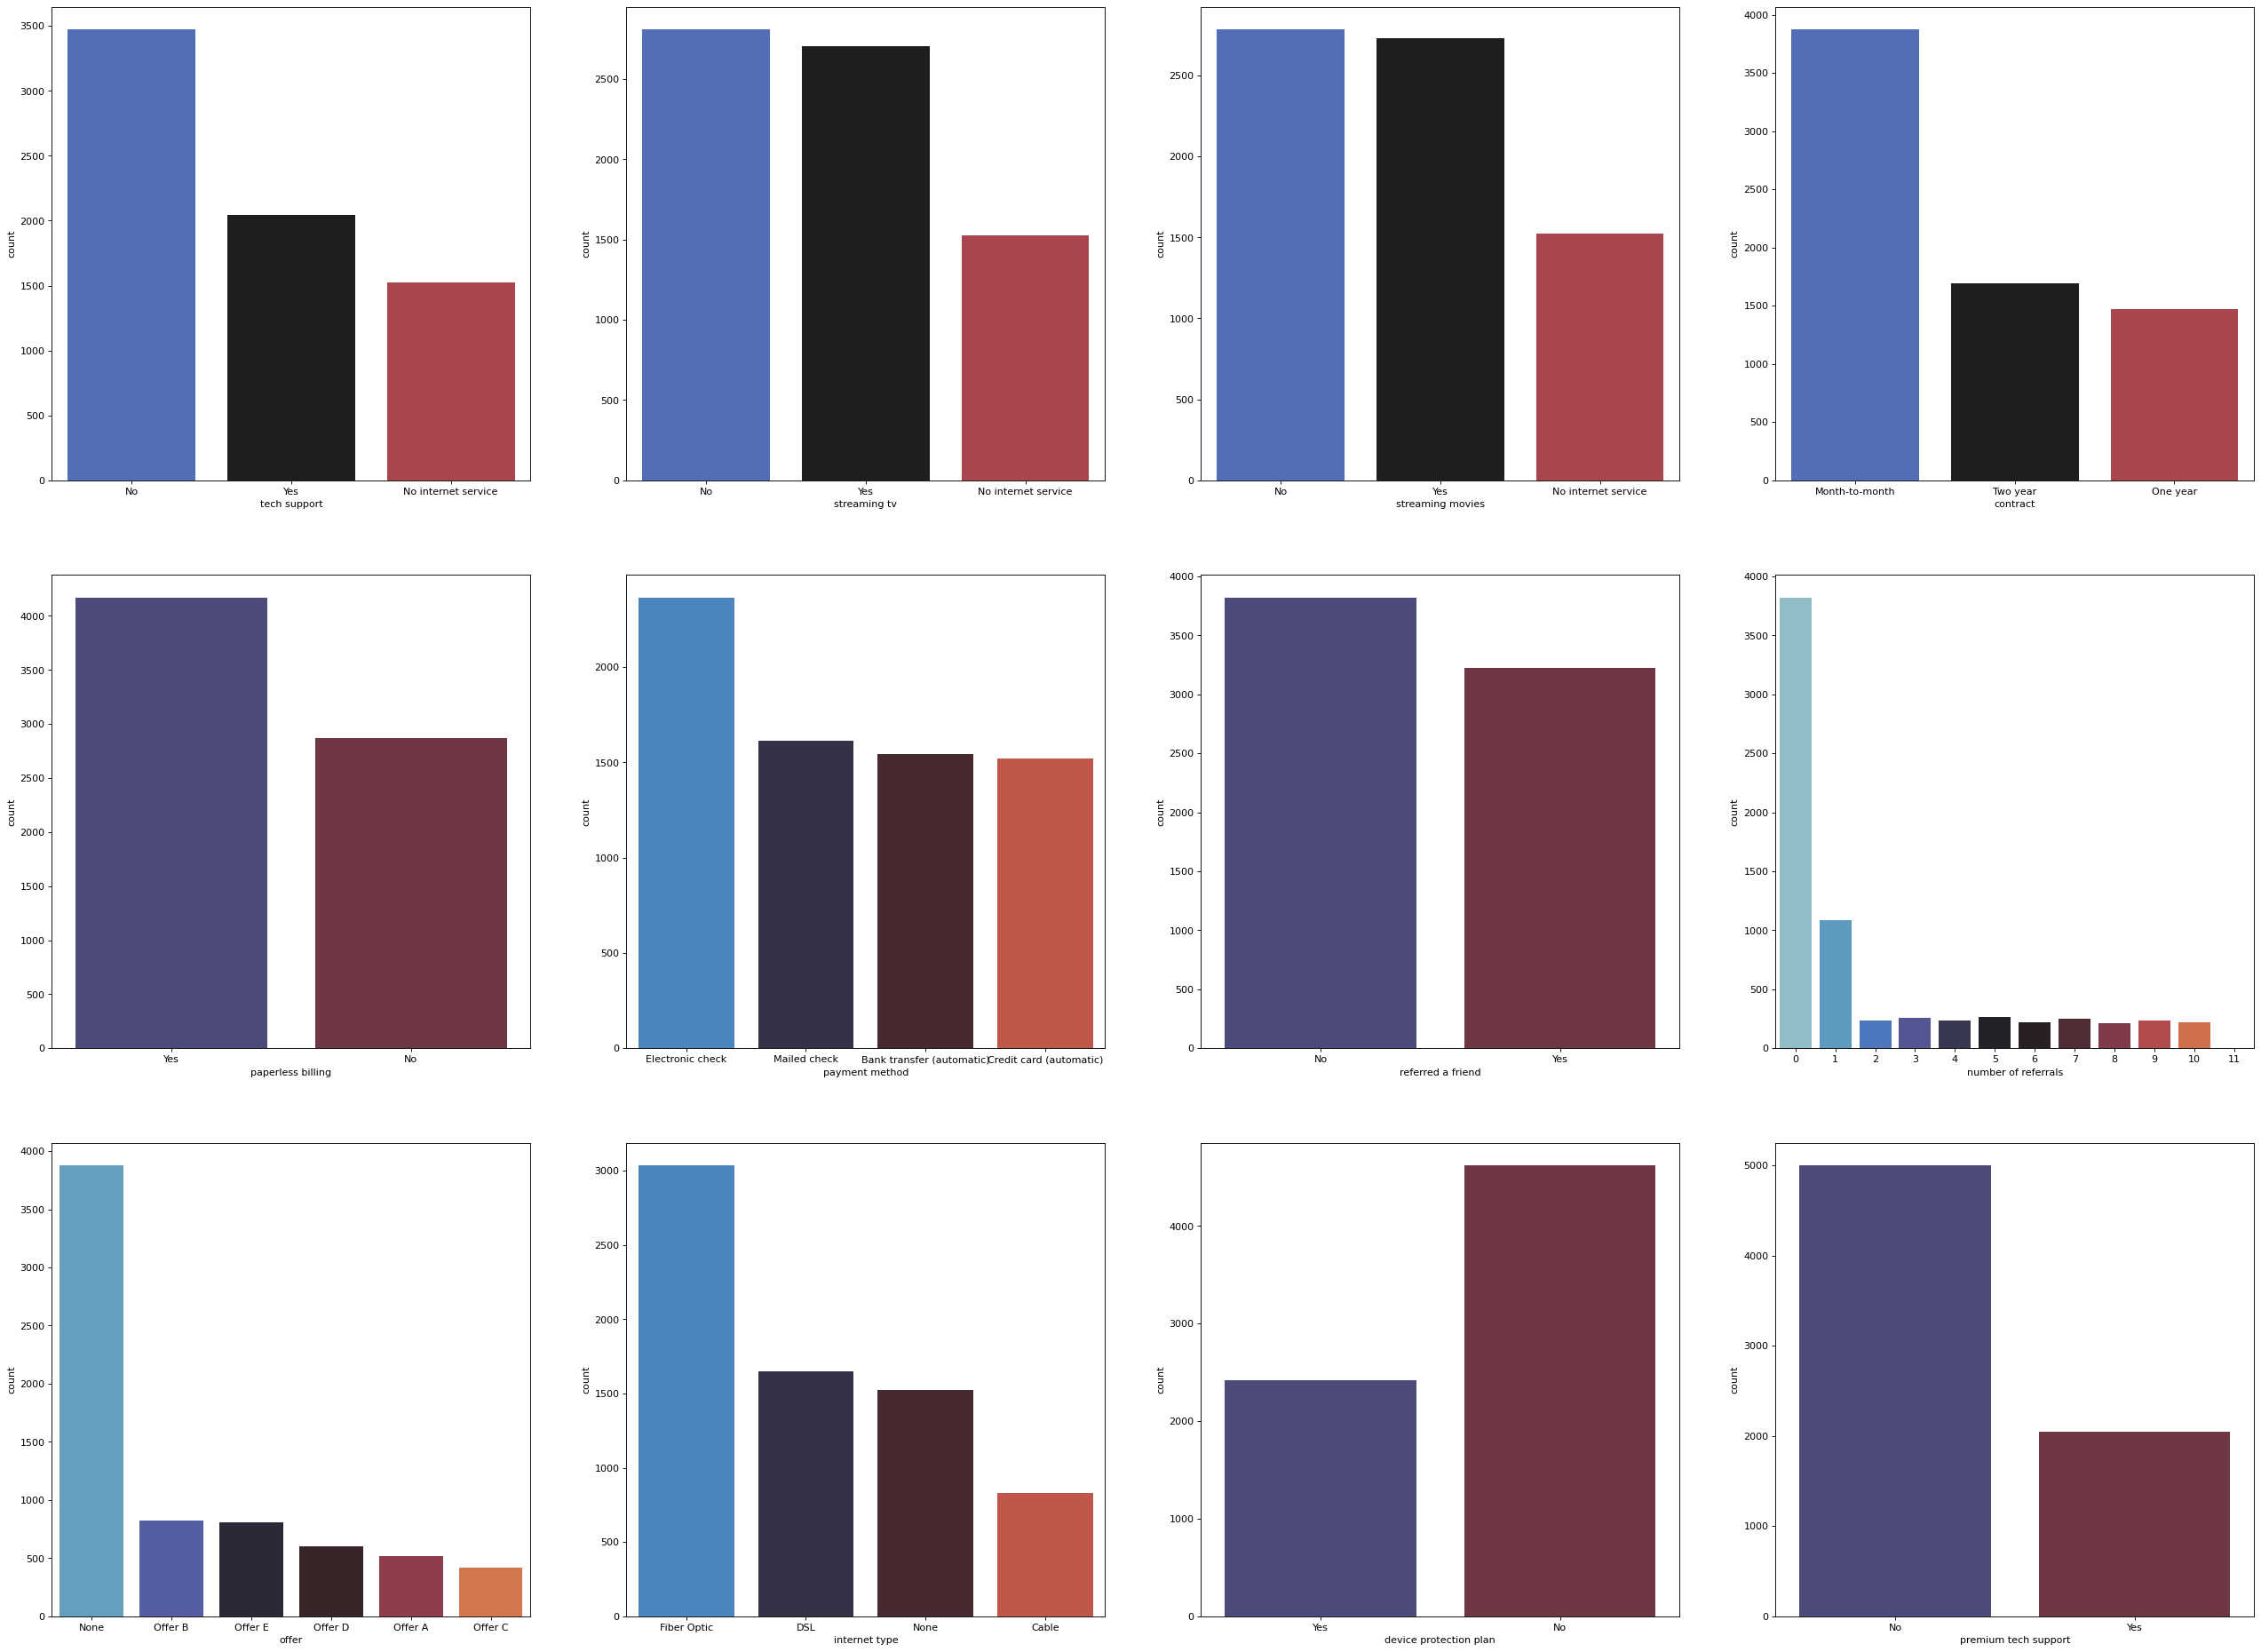

In [24]:
fig,ax=plt.subplots(3,4,figsize=(40,30),dpi=80)
sns.countplot(x=df['tech support'],ax=ax[0,0],palette='icefire')
sns.countplot(x=df['streaming tv'],ax=ax[0,1],palette='icefire')
sns.countplot(x=df['streaming movies'],ax=ax[0,2],palette='icefire')
sns.countplot(x=df['contract'],ax=ax[0,3],palette='icefire')
sns.countplot(x=df['paperless billing'],ax=ax[1,0],palette='icefire')
sns.countplot(x=df['payment method'],ax=ax[1,1],order=df['payment method'].value_counts().sort_values(ascending=False).index,palette='icefire')
####
sns.countplot(x=df['referred a friend'],ax=ax[1,2],palette='icefire')
sns.countplot(x=df['number of referrals'],ax=ax[1,3],palette='icefire')
#sns.countplot(x=df['tenure in months'],ax=ax[2,0],palette='icefire')#################LOOK AT
sns.countplot(x=df['offer'],ax=ax[2,0],order=df['offer'].value_counts().sort_values(ascending=False).index,palette='icefire')
sns.countplot(x=df['internet type'],order=df['internet type'].value_counts().sort_values(ascending=False).index,ax=ax[2,1],palette='icefire')
sns.countplot(x=df['device protection plan'],ax=ax[2,2],palette='icefire')
sns.countplot(x=df['premium tech support'],ax=ax[2,3],palette='icefire')


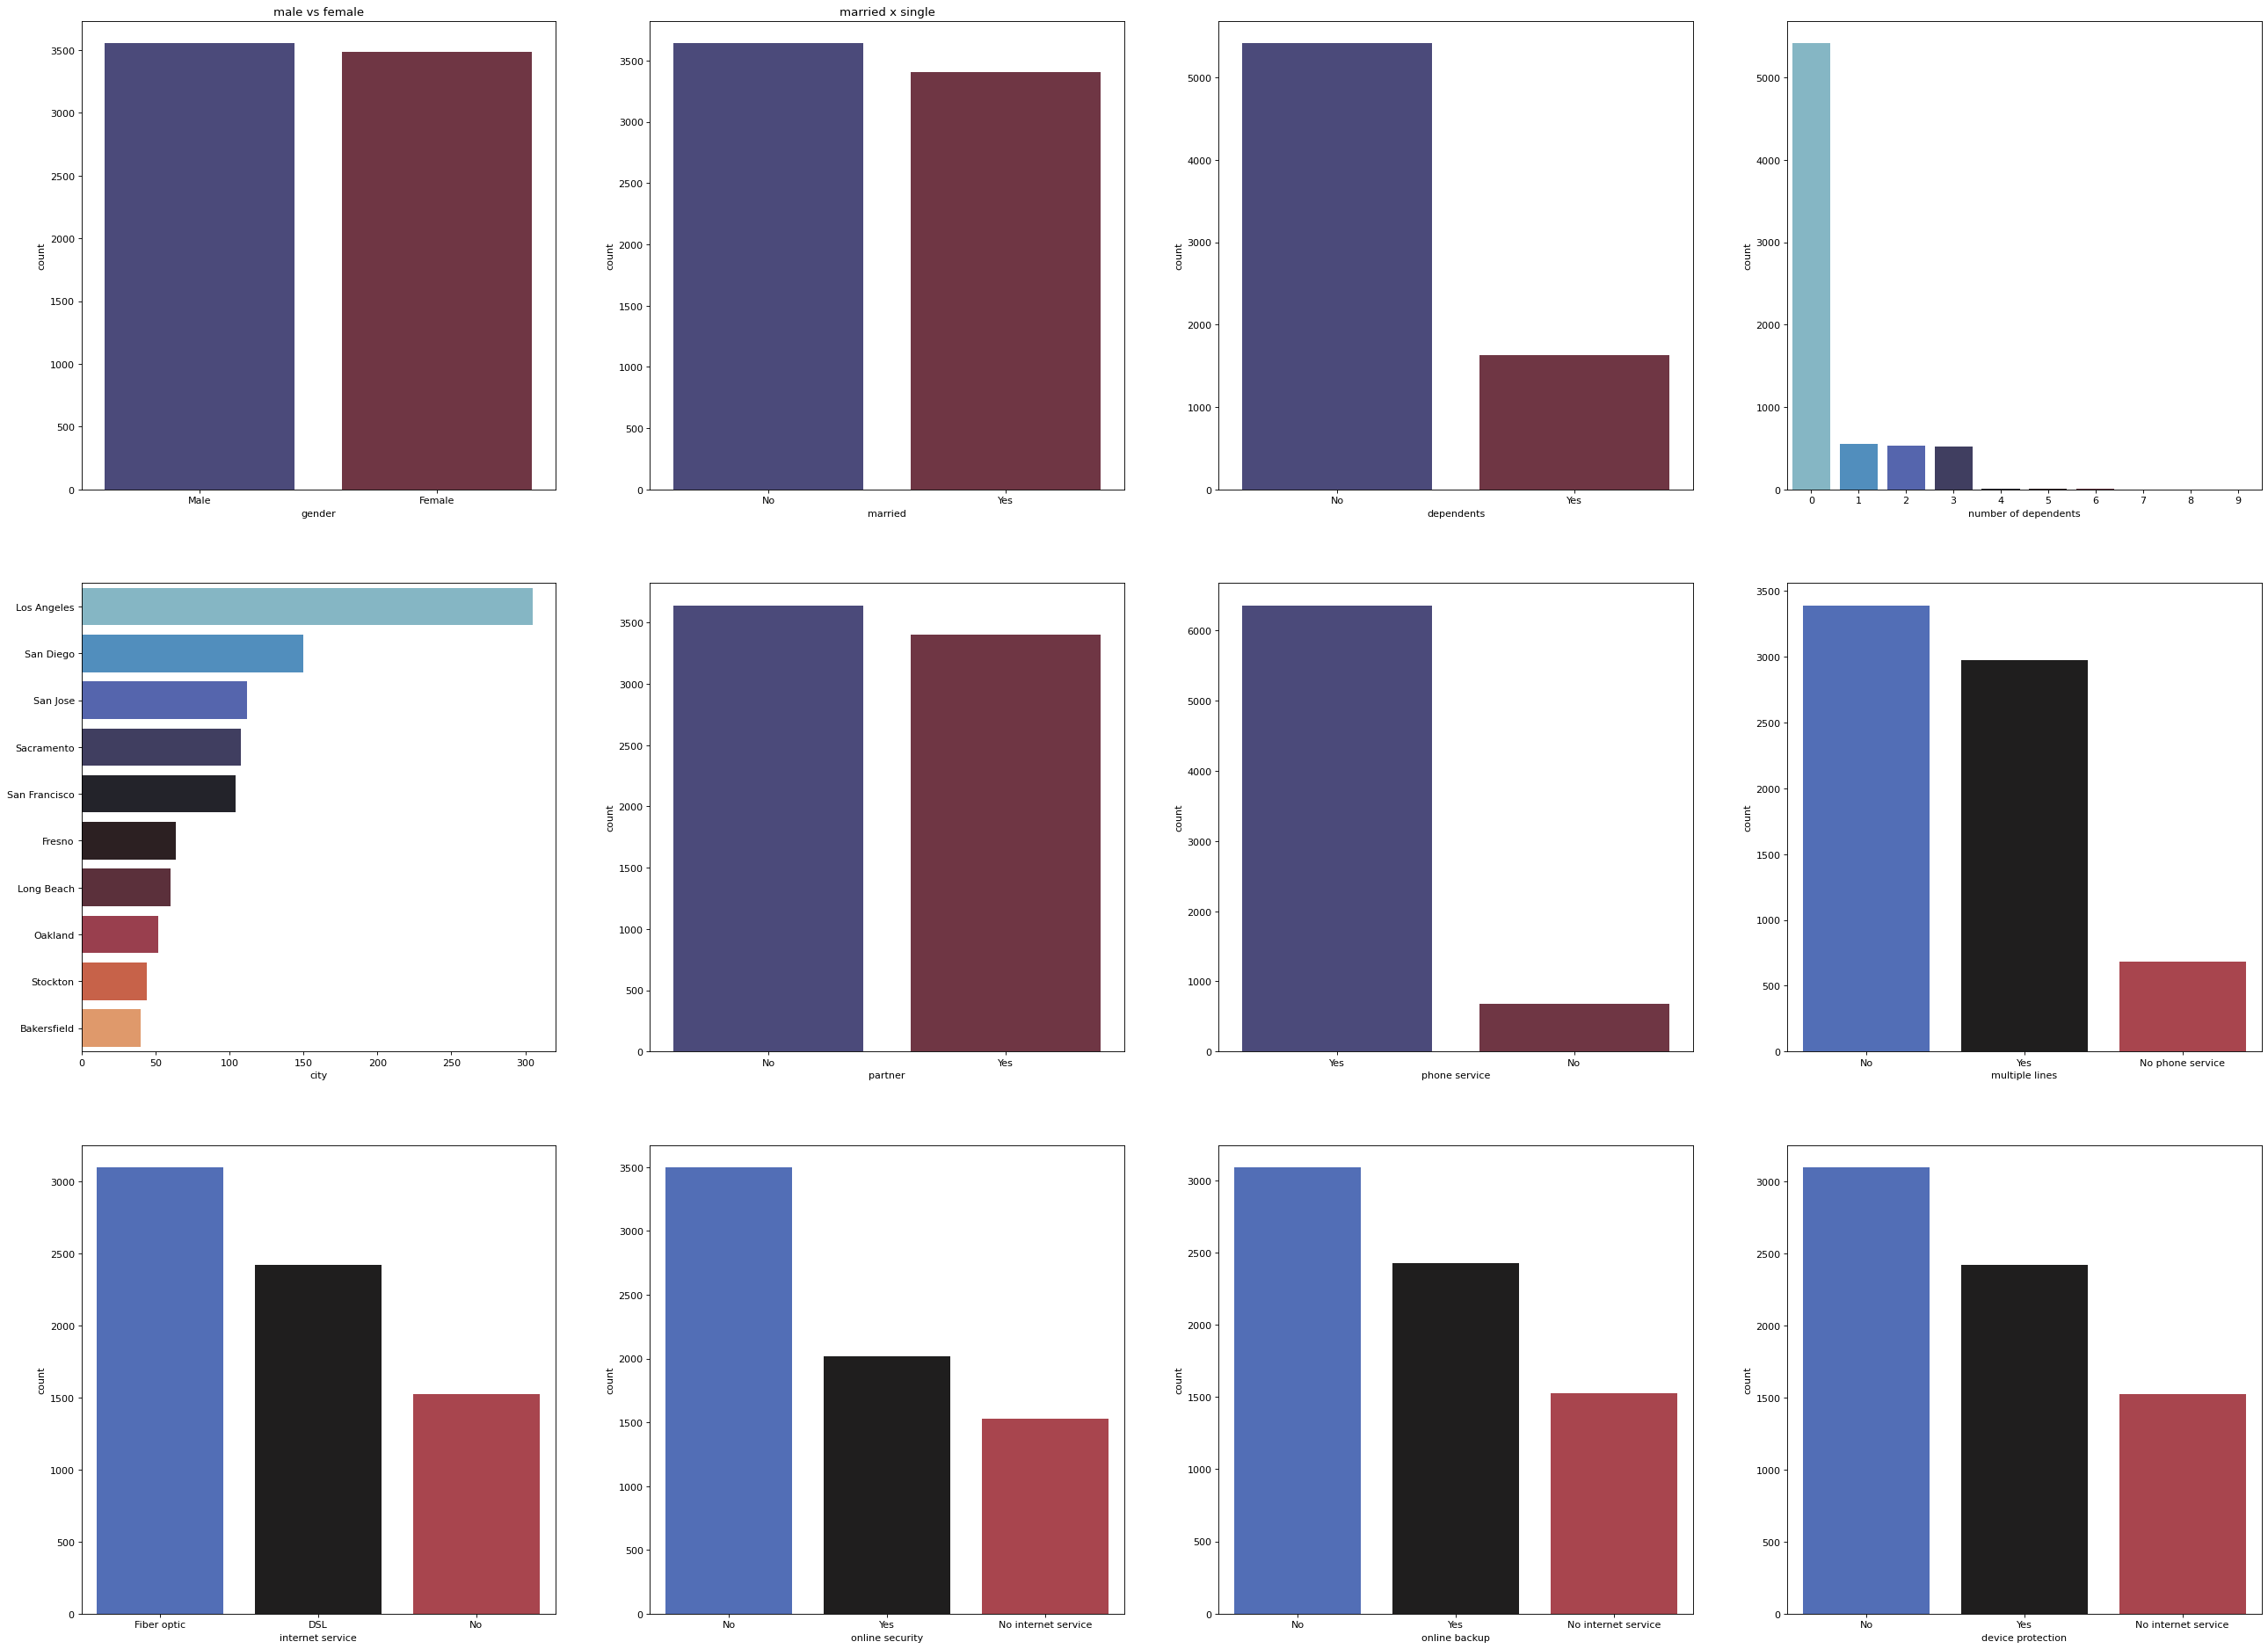

In [25]:
fig,ax=plt.subplots(3,4,figsize=(40,30),dpi=80)
sns.countplot(x=df['gender'],ax=ax[0,0],palette='icefire').set(title='male vs female')
sns.countplot(x=df['married'],ax=ax[0,1],palette='icefire').set(title='married x single')
sns.countplot(x=df['dependents'],ax=ax[0,2],palette='icefire')########vip
sns.countplot(x=df['number of dependents'],ax=ax[0,3],palette='icefire')
sns.barplot(y=df['city'].value_counts().head(10).index,x=df['city'].value_counts().head(10),ax=ax[1,0],palette='icefire')
sns.countplot(x=df['partner'],ax=ax[1,1],palette='icefire')
sns.countplot(x=df['phone service'],ax=ax[1,2],palette='icefire')
sns.countplot(x=df['multiple lines'],ax=ax[1,3],palette='icefire')
sns.countplot(x=df['internet service'],order=df['internet service'].value_counts().sort_values(ascending=False).index,ax=ax[2,0],palette='icefire')
sns.countplot(x=df['online security'],ax=ax[2,1],order=df['online security'].value_counts().sort_values(ascending=False).index,palette='icefire')
sns.countplot(x=df['online backup'],ax=ax[2,2],order=df['online security'].value_counts().sort_values(ascending=False).index,palette='icefire')
sns.countplot(x=df['device protection'],ax=ax[2,3],palette='icefire')

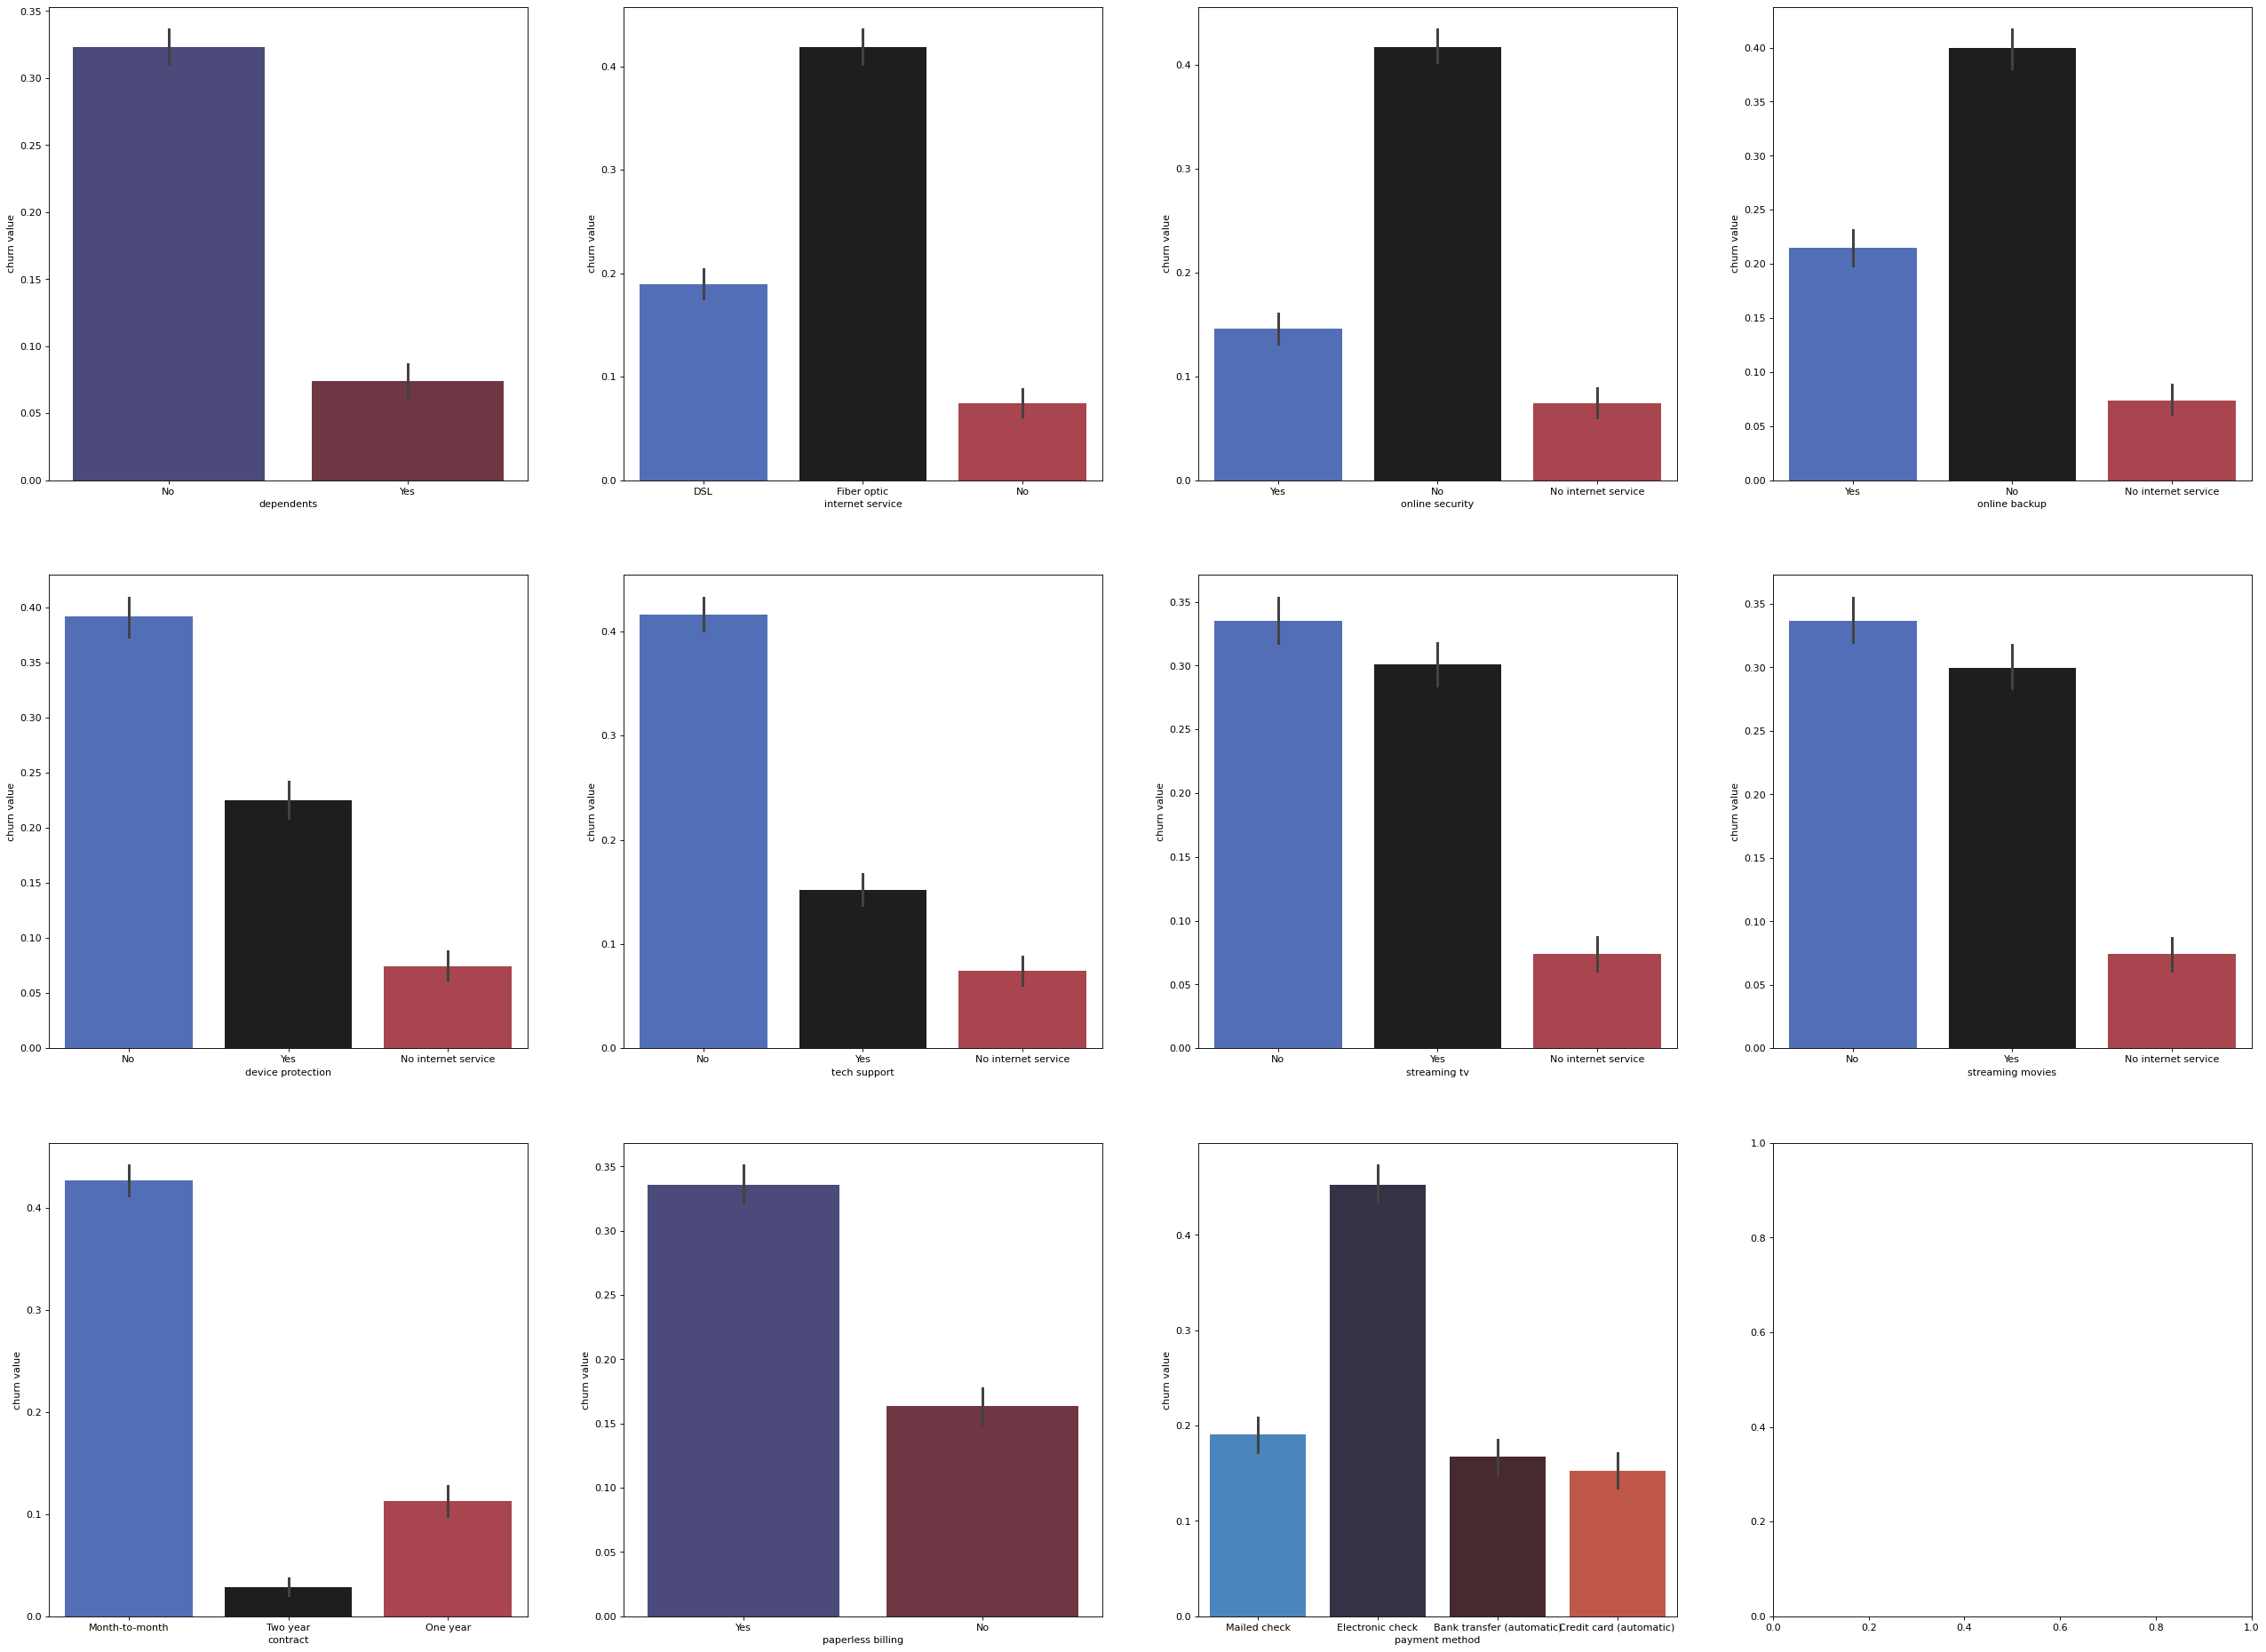

In [26]:
fig,ax=plt.subplots(3,4,figsize=(40,30),dpi=80)
sns.barplot(x=df['dependents'],y=df['churn value'],ax=ax[0,0],palette='icefire')########vip
sns.barplot(x=df['internet service'],y=df['churn value'],ax=ax[0,1],palette='icefire')########vip
sns.barplot(x=df['online security'],y=df['churn value'],ax=ax[0,2],palette='icefire')########vip
sns.barplot(x=df['online backup'],y=df['churn value'],ax=ax[0,3],palette='icefire')########vip
sns.barplot(x=df['device protection'],y=df['churn value'],ax=ax[1,0],palette='icefire')########vip
sns.barplot(x=df['tech support'],y=df['churn value'],ax=ax[1,1],palette='icefire')########vip
sns.barplot(x=df['streaming tv'],y=df['churn value'],ax=ax[1,2],palette='icefire')########vip
sns.barplot(x=df['streaming movies'],y=df['churn value'],ax=ax[1,3],palette='icefire')########vip
sns.barplot(x=df['contract'],y=df['churn value'],ax=ax[2,0],palette='icefire')########vip###########################vip
sns.barplot(x=df['paperless billing'],y=df['churn value'],ax=ax[2,1],palette='icefire')########vip###########################vip
sns.barplot(x=df['payment method'],y=df['churn value'],ax=ax[2,2],palette='icefire')########vip###########################vip

In [27]:
print(df['country'].value_counts())
print(df['state'].value_counts())

United States    7043
Name: country, dtype: int64
California    7043
Name: state, dtype: int64


In [28]:
df['married_2']=[1 if i=='Yes' else 0 for i in df['married']]

In [29]:
df['dependent_2']=[1 if i=='Yes' else 0 for i in df['dependents']]

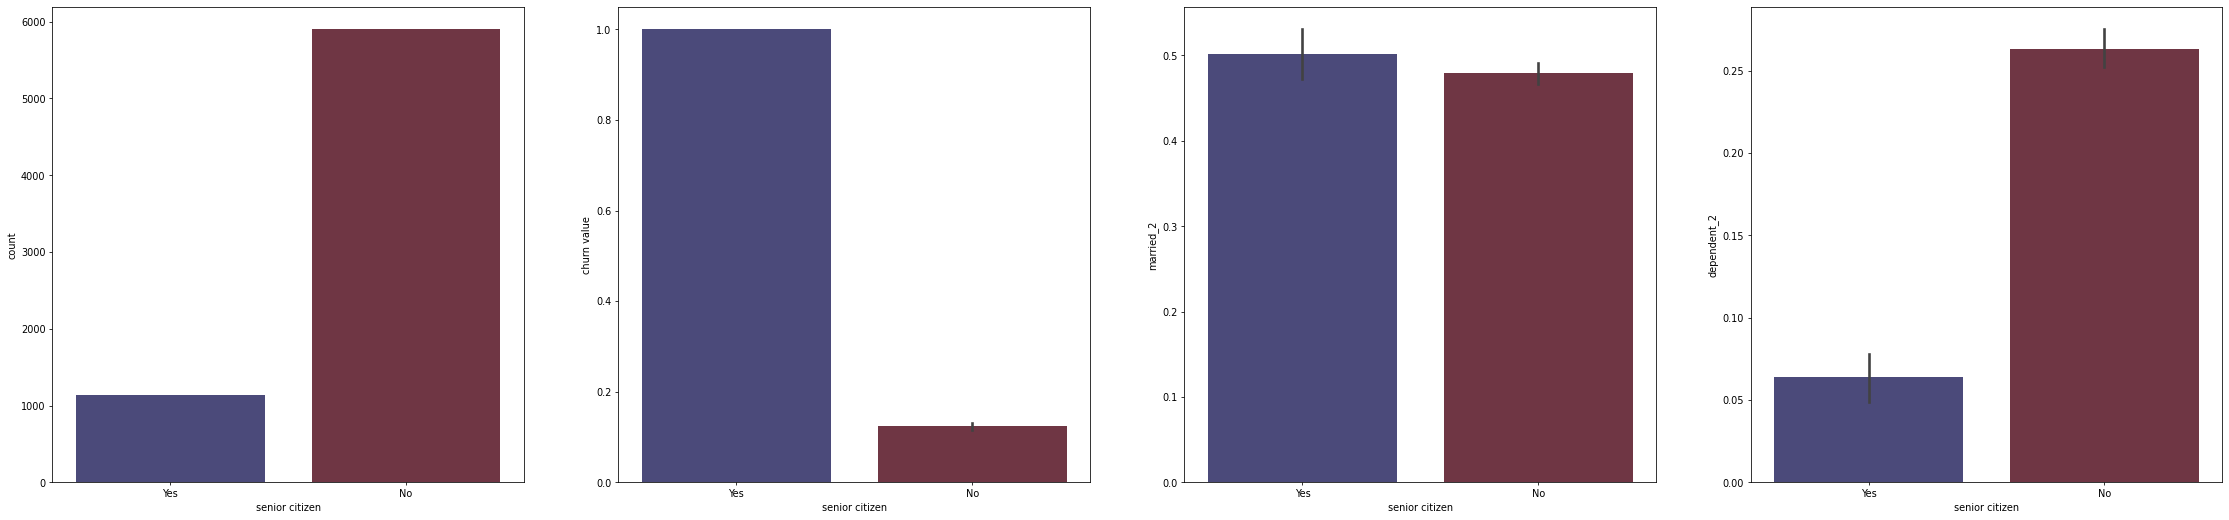

In [30]:
#Senior Citizens are very important customrs as it seems that they always churn
fig,ax=plt.subplots(1,4,figsize=(40,9),dpi=70)
sns.countplot(x=df['senior citizen'],ax=ax[0],palette='icefire')
sns.barplot(x=df['senior citizen'],y=df['churn value'],ax=ax[1],palette='icefire')
sns.barplot(x=df['senior citizen'],y=df['married_2'],ax=ax[2],palette='icefire')
sns.barplot(x=df['senior citizen'],y=df['dependent_2'],ax=ax[3],palette='icefire')

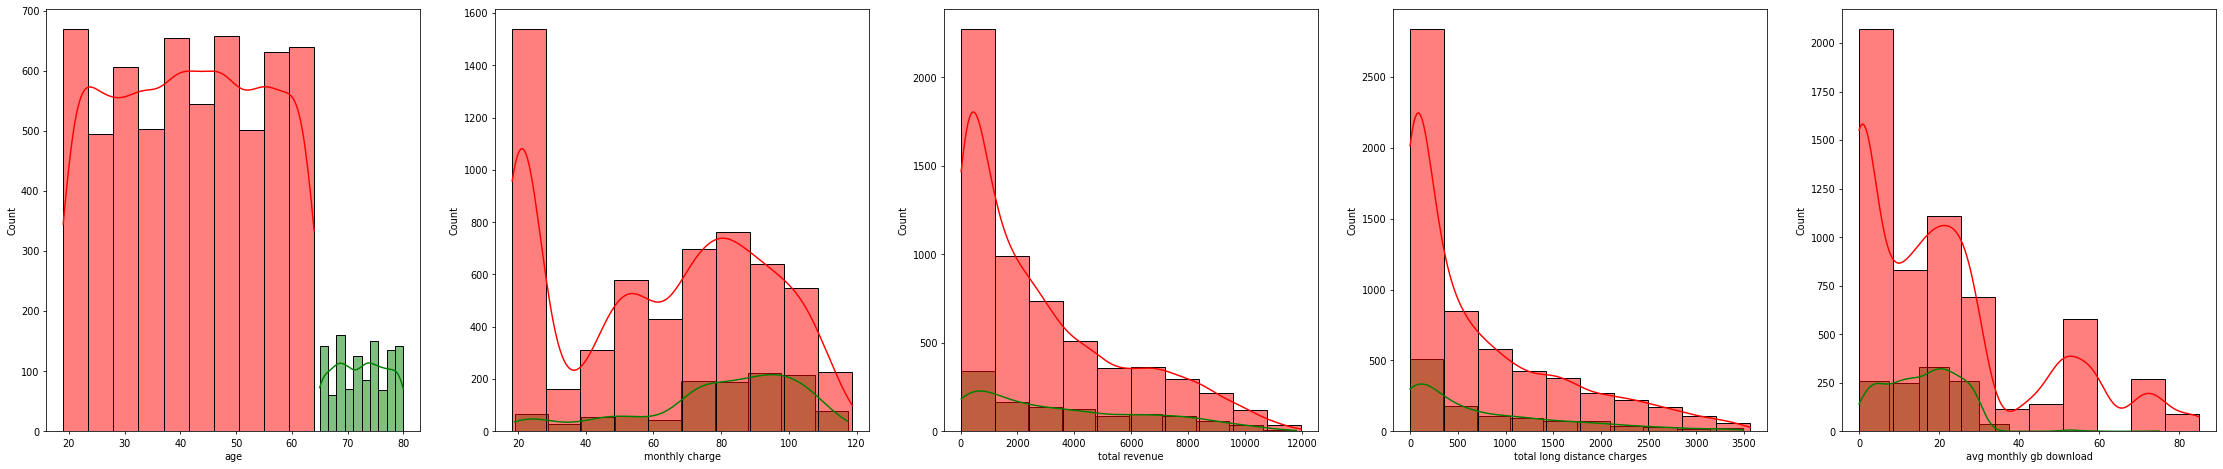

In [31]:
fig,ax=plt.subplots(1,5,figsize=(40,8),dpi=70)
sns.histplot(x=df[df['senior citizen']=='Yes']['age'],ax=ax[0],kde=True,bins=10,color='g')
sns.histplot(x=df[df['senior citizen']=='No']['age'],ax=ax[0],kde=True,bins=10,color='r')
sns.histplot(x=df[df['senior citizen']=='Yes']['monthly charge'],ax=ax[1],kde=True,bins=10,color='g')
sns.histplot(x=df[df['senior citizen']=='No']['monthly charge'],ax=ax[1],kde=True,bins=10,color='r')
sns.histplot(x=df[df['senior citizen']=='Yes']['total revenue'],ax=ax[2],kde=True,bins=10,color='g')
sns.histplot(x=df[df['senior citizen']=='No']['total revenue'],ax=ax[2],kde=True,bins=10,color='r')
sns.histplot(x=df[df['senior citizen']=='Yes']['total long distance charges'],ax=ax[3],kde=True,bins=10,color='g')
sns.histplot(x=df[df['senior citizen']=='No']['total long distance charges'],ax=ax[3],kde=True,bins=10,color='r')
sns.histplot(x=df[df['senior citizen']=='Yes']['avg monthly gb download'],ax=ax[4],kde=True,bins=10,color='g')
sns.histplot(x=df[df['senior citizen']=='No']['avg monthly gb download'],ax=ax[4],kde=True,bins=10,color='r')

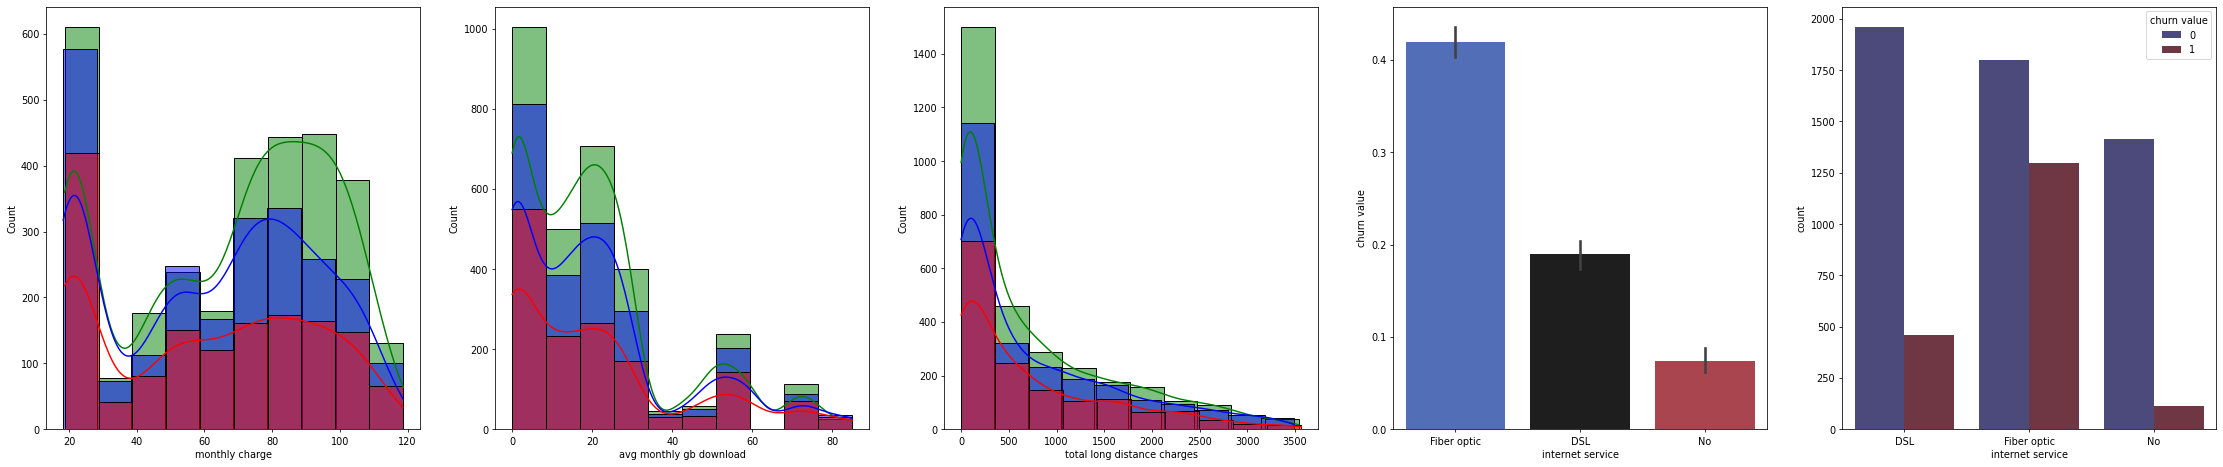

In [398]:
#Lets focus on how the internet service affect the customer churn
fig,ax=plt.subplots(1,5,figsize=(40,8),dpi=70)
sns.histplot(x=df[df['internet service']=='Fiber optic']['monthly charge'],ax=ax[0],kde=True,bins=10,color='g')
sns.histplot(x=df[df['internet service']=='DSL']['monthly charge'],ax=ax[0],kde=True,bins=10,color='b')
sns.histplot(x=df[df['internet service']=='No']['monthly charge'],ax=ax[0],kde=True,bins=10,color='r')
##
sns.histplot(x=df[df['internet service']=='Fiber optic']['avg monthly gb download'],ax=ax[1],kde=True,bins=10,color='g')
sns.histplot(x=df[df['internet service']=='DSL']['avg monthly gb download'],ax=ax[1],kde=True,bins=10,color='b')
sns.histplot(x=df[df['internet service']=='No']['avg monthly gb download'],ax=ax[1],kde=True,bins=10,color='r')
##
sns.histplot(x=df[df['internet service']=='Fiber optic']['total long distance charges'],ax=ax[2],kde=True,bins=10,color='g')
sns.histplot(x=df[df['internet service']=='DSL']['total long distance charges'],ax=ax[2],kde=True,bins=10,color='b')
sns.histplot(x=df[df['internet service']=='No']['total long distance charges'],ax=ax[2],kde=True,bins=10,color='r')
##
sns.barplot(x=df['internet service'],y=df['churn value'],palette='icefire',order=df.groupby(df['internet service'])['churn value'].mean().sort_values(ascending=False).index,ax=ax[3])
sns.countplot(x=df['internet service'],hue=df['churn value'],palette='icefire',ax=ax[4])

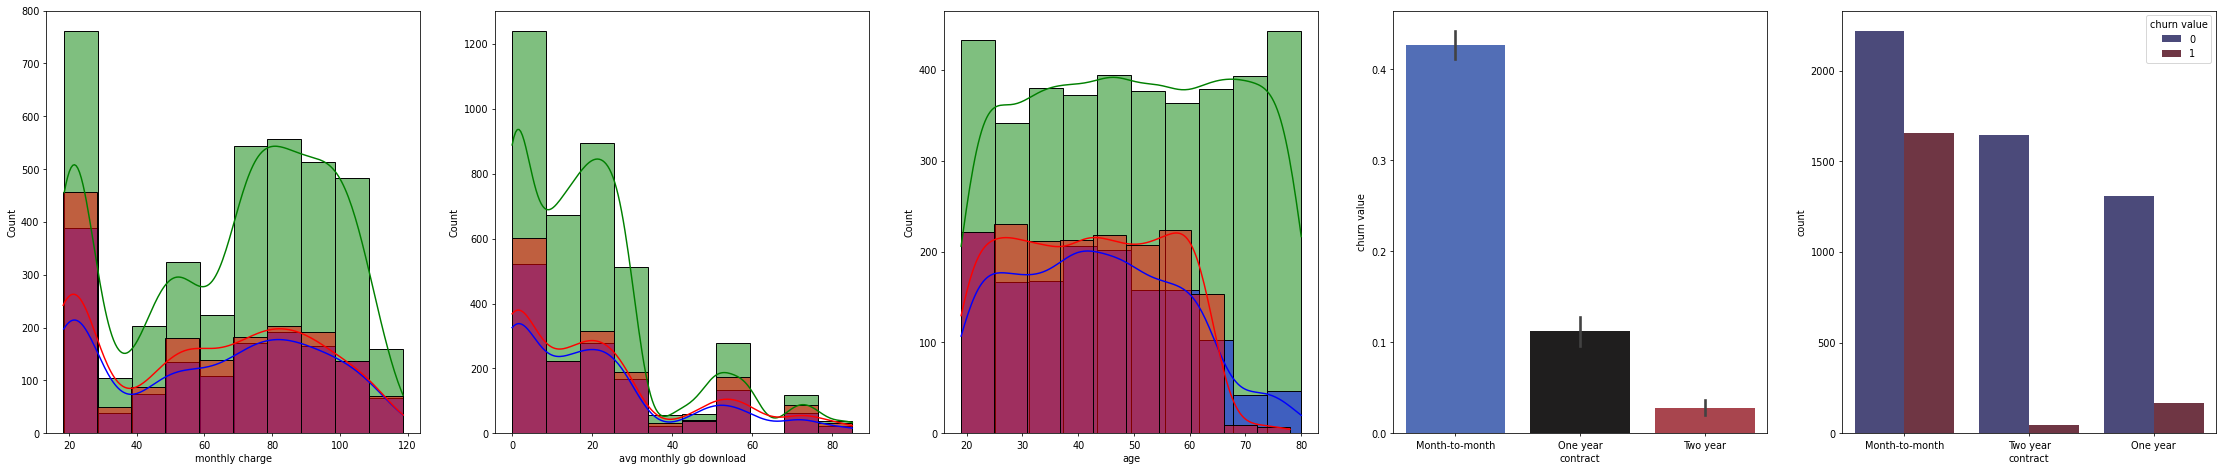

In [415]:
fig,ax=plt.subplots(1,5,figsize=(40,8),dpi=70)
sns.histplot(x=df[df['contract']=='Month-to-month']['monthly charge'],ax=ax[0],kde=True,bins=10,color='g')
sns.histplot(x=df[df['contract']=='One year']['monthly charge'],ax=ax[0],kde=True,bins=10,color='b')
sns.histplot(x=df[df['contract']=='Two year']['monthly charge'],ax=ax[0],kde=True,bins=10,color='r')
##
sns.histplot(x=df[df['contract']=='Month-to-month']['avg monthly gb download'],ax=ax[1],kde=True,bins=10,color='g')
sns.histplot(x=df[df['contract']=='One year']['avg monthly gb download'],ax=ax[1],kde=True,bins=10,color='b')
sns.histplot(x=df[df['contract']=='Two year']['avg monthly gb download'],ax=ax[1],kde=True,bins=10,color='r')
##
sns.histplot(x=df[df['contract']=='Month-to-month']['age'],ax=ax[2],kde=True,bins=10,color='g')
sns.histplot(x=df[df['contract']=='One year']['age'],ax=ax[2],kde=True,bins=10,color='b')
sns.histplot(x=df[df['contract']=='Two year']['age'],ax=ax[2],kde=True,bins=10,color='r')
##
sns.barplot(x=df['contract'],y=df['churn value'],palette='icefire',order=df.groupby(df['contract'])['churn value'].mean().sort_values(ascending=False).index,ax=ax[3])
sns.countplot(x=df['contract'],hue=df['churn value'],palette='icefire',ax=ax[4])

In [417]:
df[df['contract']=='Two year']['senior citizen'].value_counts()

No     1674
Yes      21
Name: senior citizen, dtype: int64

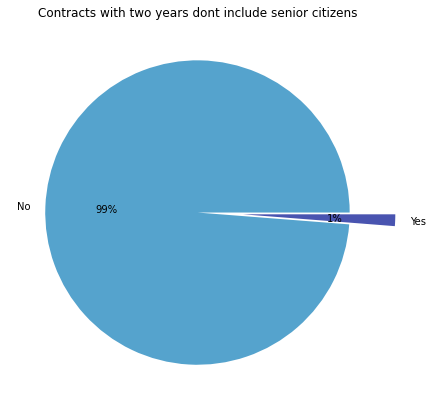

In [422]:
plt.figure(figsize=(15,7))
values=[1674,21]
labels=['No','Yes']
explode=[0,0.3]
palette_color=sns.color_palette('icefire')
plt.pie(values,labels=labels,colors=palette_color,explode=explode,autopct='%.0f%%')
plt.title('Contracts with two years dont include senior citizens')
plt.show()

In [423]:
df['tech support'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: tech support, dtype: int64

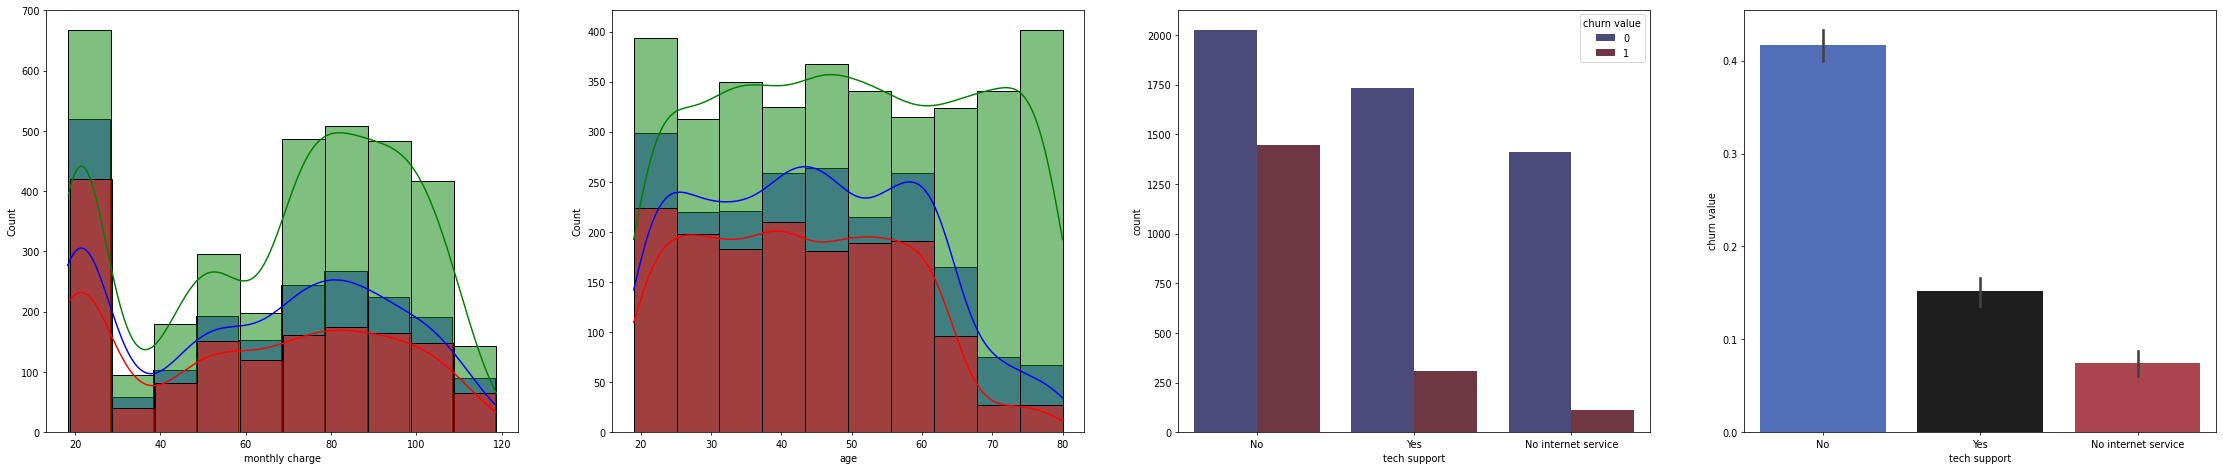

In [444]:
fig,ax=plt.subplots(1,4,figsize=(40,8),dpi=70)
sns.histplot(x=df[df['tech support']=='Yes']['monthly charge'],ax=ax[0],kde=True,bins=10,color='b')
sns.histplot(x=df[df['tech support']=='No']['monthly charge'],ax=ax[0],kde=True,bins=10,color='g')
sns.histplot(x=df[df['tech support']=='No internet service']['monthly charge'],ax=ax[0],kde=True,bins=10,color='r')
##
sns.histplot(x=df[df['tech support']=='Yes']['age'],ax=ax[1],kde=True,bins=10,color='b')
sns.histplot(x=df[df['tech support']=='No']['age'],ax=ax[1],kde=True,bins=10,color='g')
sns.histplot(x=df[df['tech support']=='No internet service']['age'],ax=ax[1],kde=True,bins=10,color='r')
##
sns.countplot(x=df['tech support'],hue=df['churn value'],palette='icefire',ax=ax[2])
sns.barplot(x=df['tech support'],y=df['churn value'],palette='icefire',order=df.groupby(df['tech support'])['churn value'].mean().sort_values(ascending=False).index,ax=ax[3])


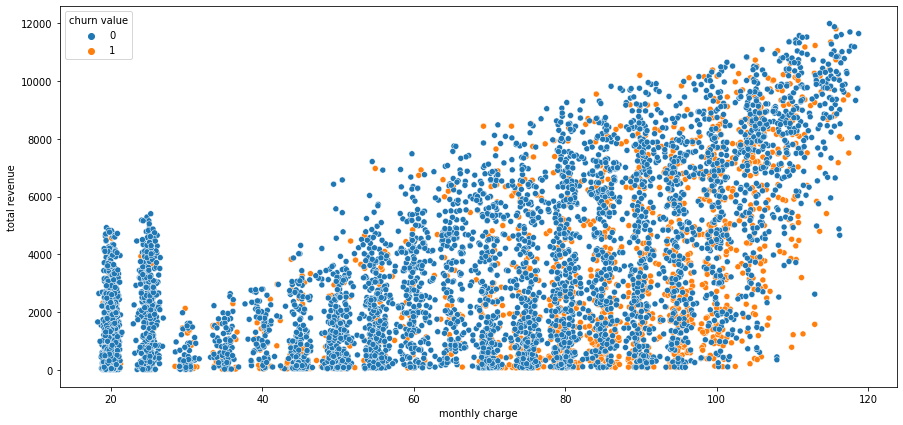

In [400]:
plt.figure(figsize=(15,7))
sns.scatterplot(x=df['monthly charge'],y=df['total revenue'],hue=df['churn value'])

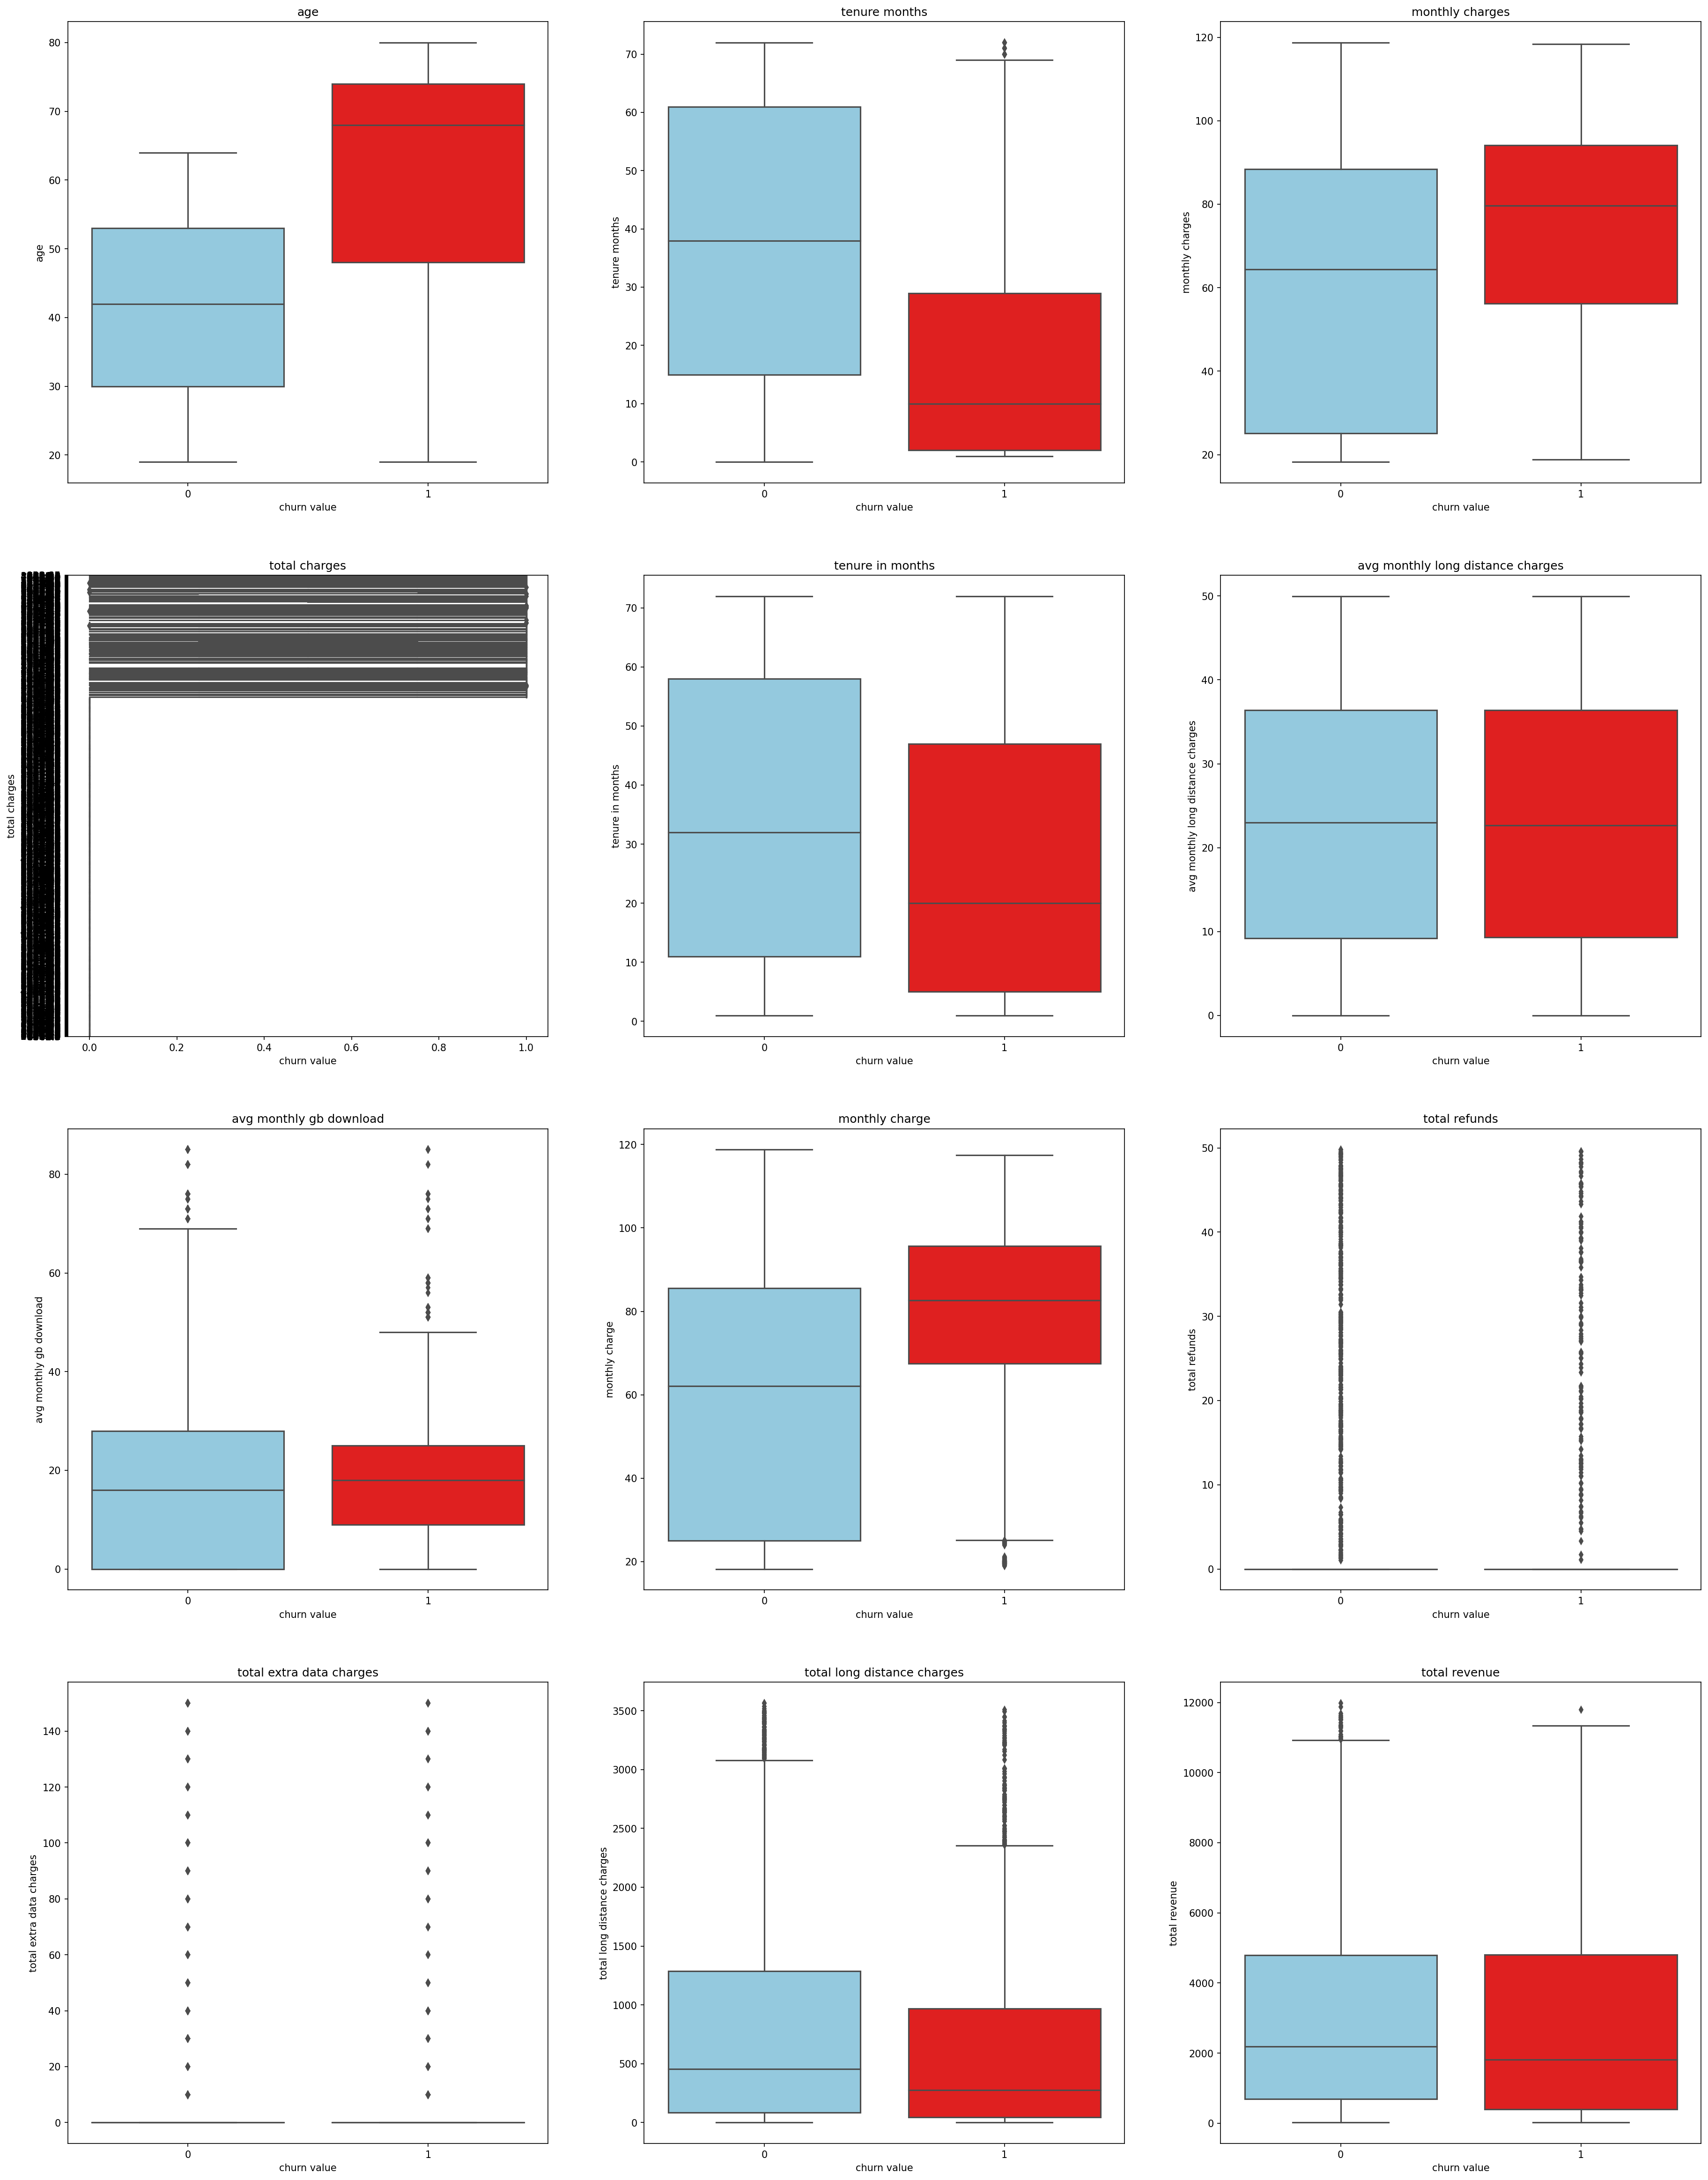

In [452]:
boxplot=df[['age','tenure months','monthly charges','total charges','tenure in months','avg monthly long distance charges',
            'avg monthly gb download','monthly charge','total refunds','total extra data charges',
            'total long distance charges', 'total revenue']]
plt.figure(figsize=(30,40),dpi=150)            
for i,key in enumerate(boxplot.columns):
  ax=plt.subplot(4,3,i+1)
  sns.boxplot(x=df['churn value'],y=df[key],palette=['skyblue','r'])
  plt.title(key)
plt.show()  

In [34]:
lose=df[df['churn value']==0]
win=df[df['churn value']==1]

In [35]:
df['total charges']=[0 if i ==' ' else i for i in df['total charges']]

In [36]:
df.iloc[2234]['total charges']

0.0

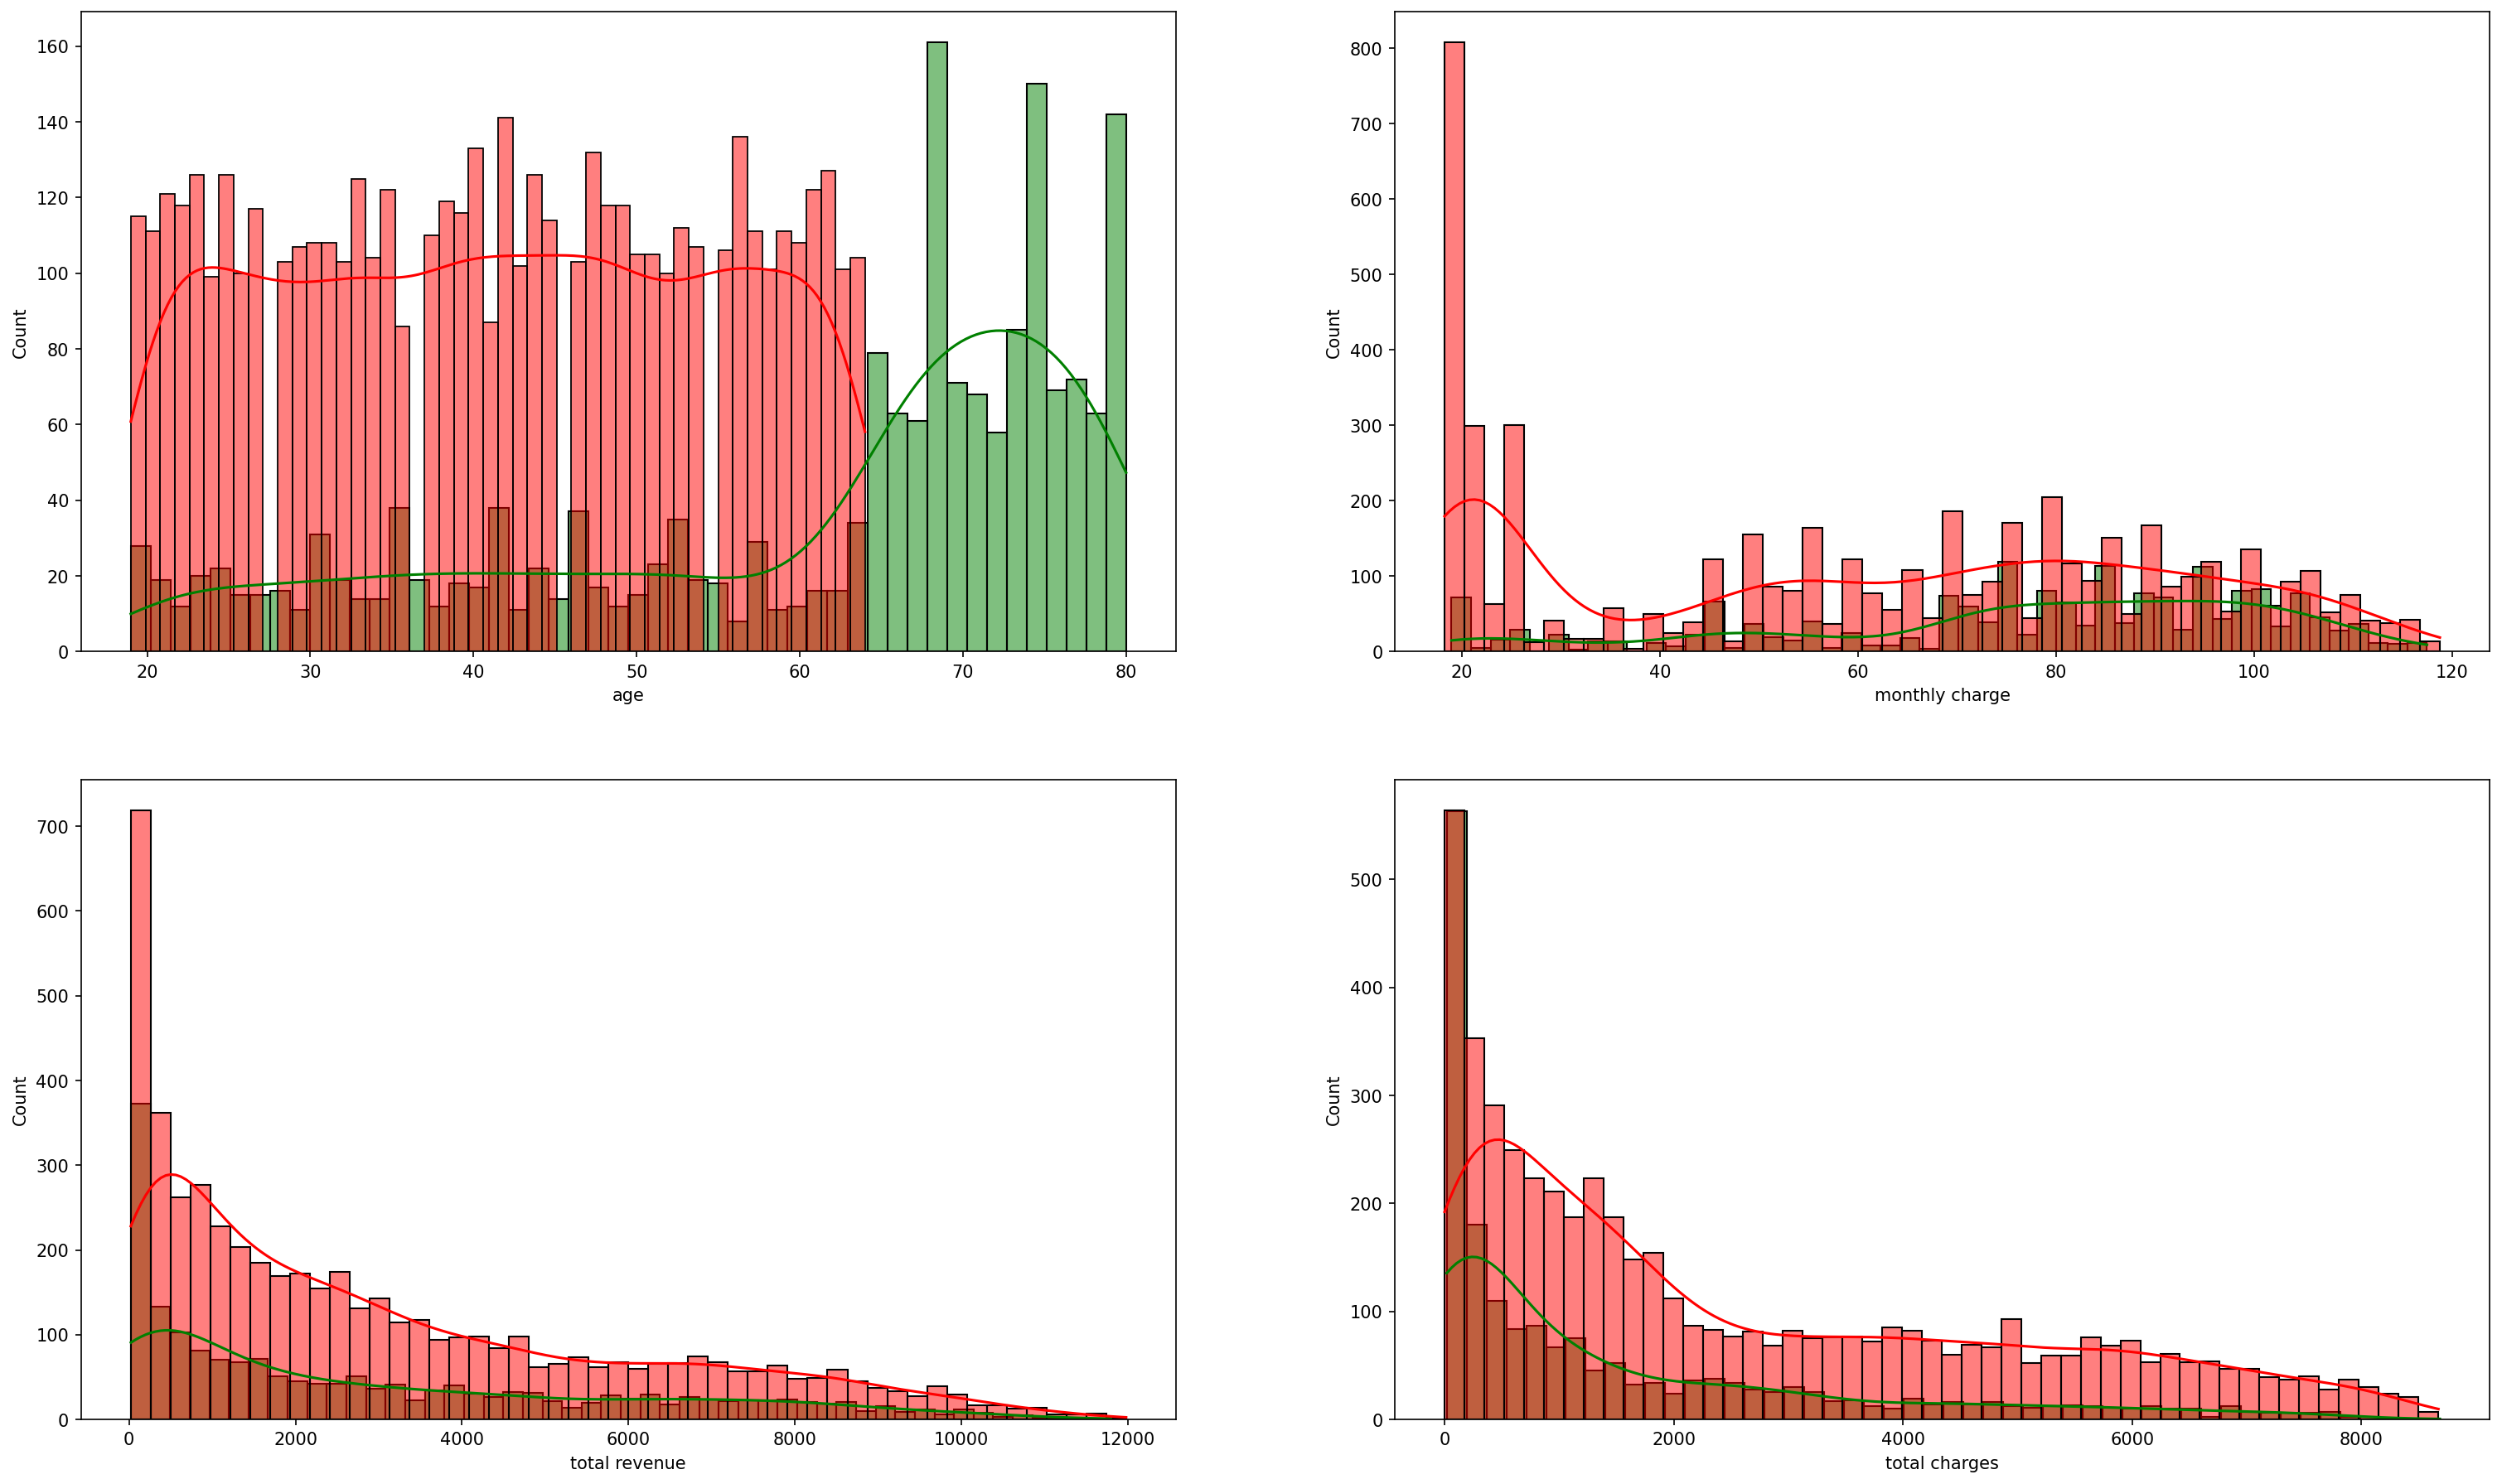

In [37]:
fig,ax=plt.subplots(2,2,figsize=(25,15),dpi=150)
sns.histplot(win['age'],kde=True,color='g',ax=ax[0,0],bins=50)
sns.histplot(lose['age'],kde=True,color='r',ax=ax[0,0],bins=50)
sns.histplot(win['monthly charge'],kde=True,color='g',ax=ax[0,1],bins=50)
sns.histplot(lose['monthly charge'],kde=True,color='r',ax=ax[0,1],bins=50)
sns.histplot(df[df['churn value']==1]['total revenue'],kde=True,color='g',ax=ax[1,0],bins=50)
sns.histplot(df[df['churn value']==0]['total revenue'],kde=True,color='r',ax=ax[1,0],bins=50)
sns.histplot(df[df['churn value']==1]['total charges'],kde=True,color='g',ax=ax[1,1],bins=50)
sns.histplot(df[df['churn value']==0]['total charges'],kde=True,color='r',ax=ax[1,1],bins=50)

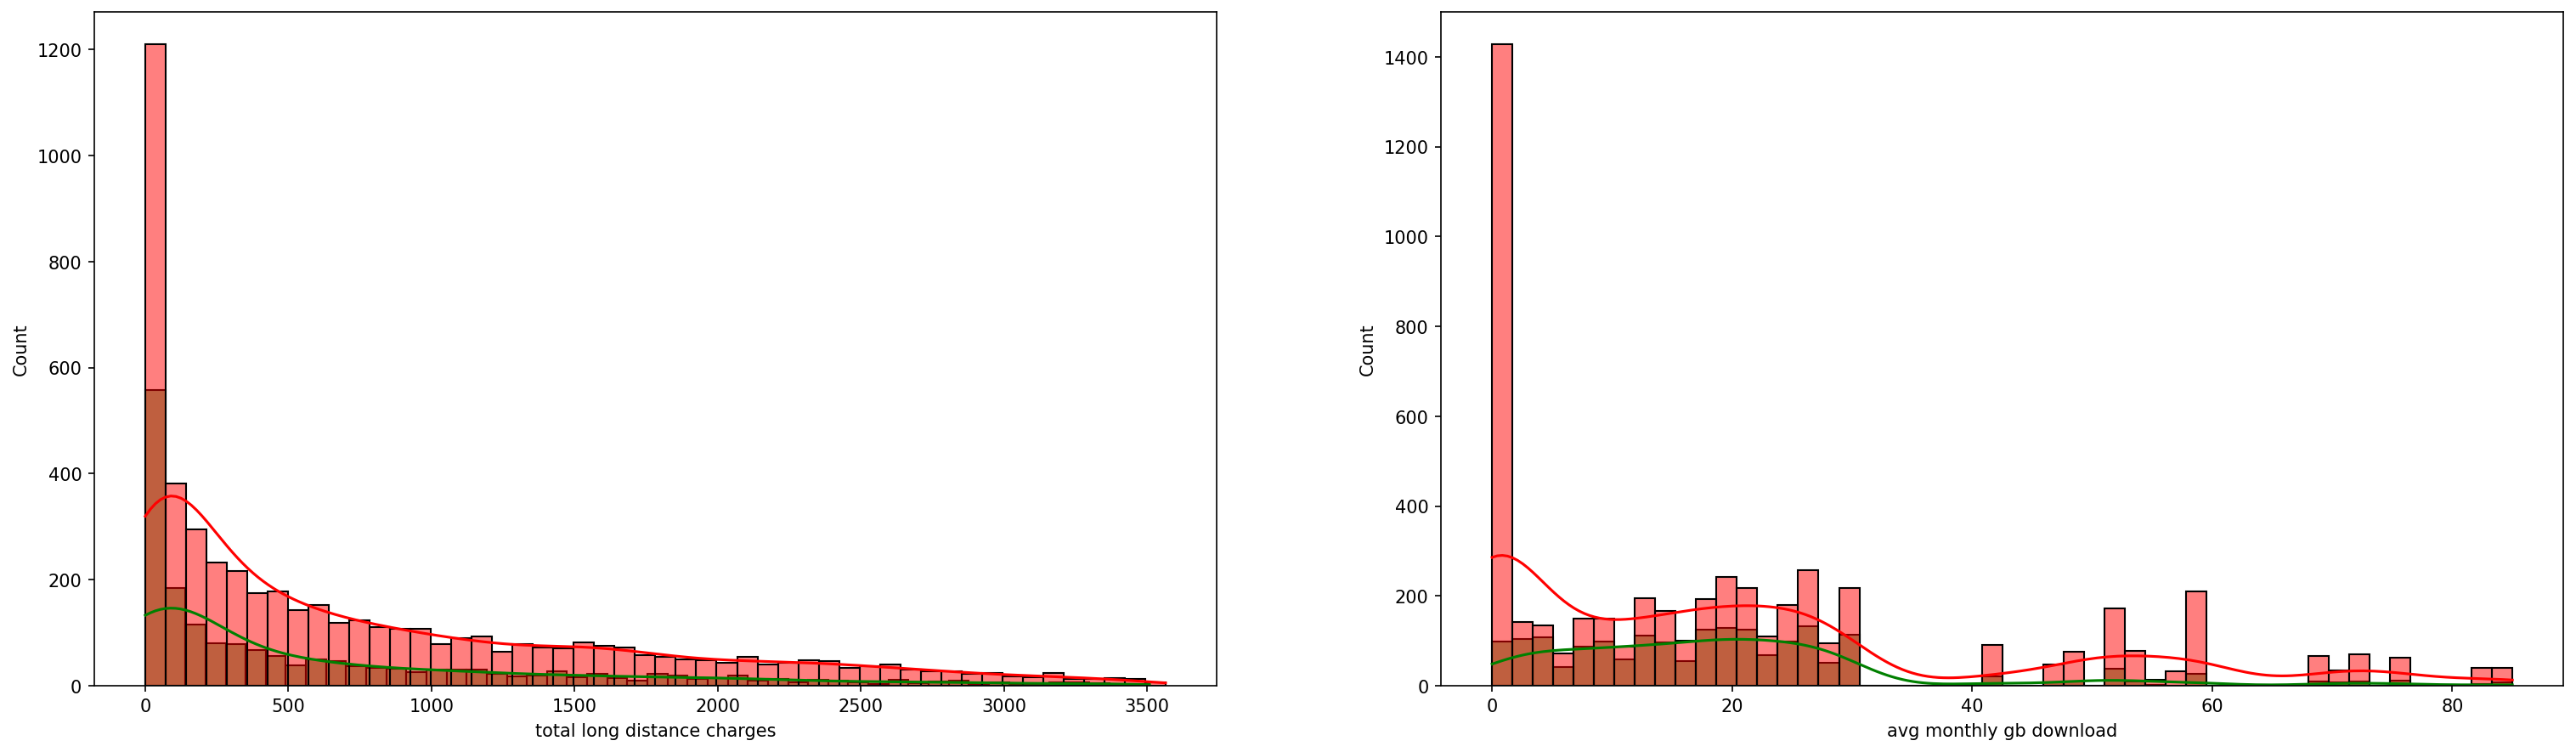

In [440]:
fig,ax=plt.subplots(1,2,figsize=(25,7),dpi=150)
sns.histplot(win['total long distance charges'],kde=True,color='g',ax=ax[0],bins=50)
sns.histplot(lose['total long distance charges'],kde=True,color='r',ax=ax[0],bins=50)
sns.histplot(win['avg monthly gb download'],kde=True,color='g',ax=ax[1],bins=50)
sns.histplot(lose['avg monthly gb download'],kde=True,color='r',ax=ax[1],bins=50)

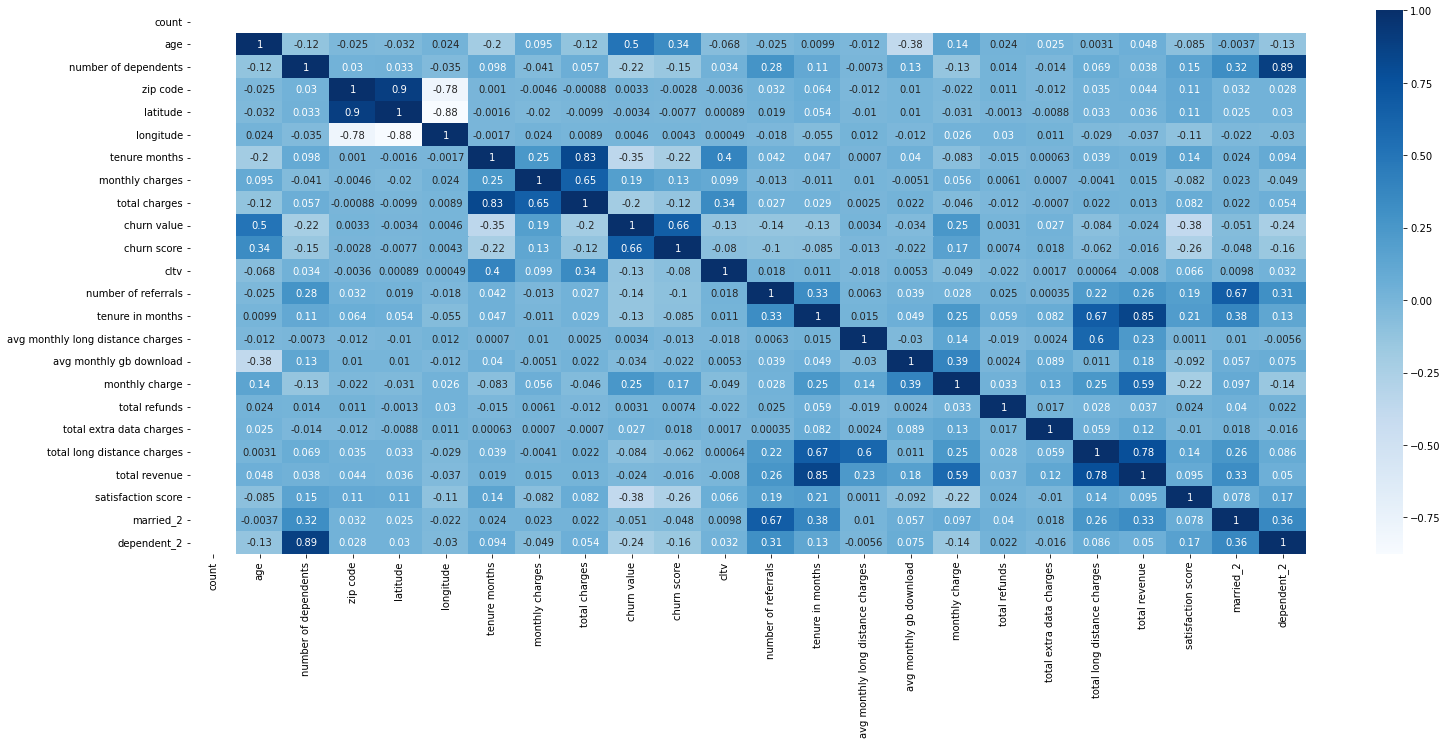

In [40]:
#######number of referals and married people
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

#Data preprocessing


In [196]:
from sklearn.model_selection import train_test_split

#x=x_df.drop(['customer status', 'churn category', 'married_2', 'dependent_2','satisfaction score','churn value', 'churn score','churn reason', 'churn label', 'lat long'],axis=1)
x=x_df[['age', 'senior citizen', 'dependents', 'number of dependents',
       'partner', 'online security', 'online backup', 'device protection',
       'tech support', 'contract', 'paperless billing', 'monthly charges',
       'total charges', 'cltv', 'number of referrals',
       'tenure in months', 'premium tech support','tenure months','unlimited data',
       'monthly charge']]
y=x_df['churn value']

In [214]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x[['monthly charges','total charges','monthly charge','cltv','tenure in months','tenure months','age']]=scaler.fit_transform(x[['monthly charges','total charges','monthly charge','cltv','tenure in months','tenure months','age']])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [186]:
x_df.columns

Index(['customer id', 'count', 'gender', 'age', 'under 30', 'senior citizen',
       'married', 'dependents', 'number of dependents', 'country', 'state',
       'city', 'zip code', 'lat long', 'latitude', 'longitude', 'partner',
       'tenure months', 'phone service', 'multiple lines', 'internet service',
       'online security', 'online backup', 'device protection', 'tech support',
       'streaming tv', 'streaming movies', 'contract', 'paperless billing',
       'payment method', 'monthly charges', 'total charges', 'churn label',
       'churn value', 'churn score', 'cltv', 'churn reason', 'quarter',
       'referred a friend', 'number of referrals', 'tenure in months', 'offer',
       'avg monthly long distance charges', 'internet type',
       'avg monthly gb download', 'device protection plan',
       'premium tech support', 'streaming music', 'unlimited data',
       'monthly charge', 'total refunds', 'total extra data charges',
       'total long distance charges', 'total reve

In [215]:
x.head()

age  senior citizen  dependents  number of dependents  partner  \
0  1.880110               1           0                     0        0   
1  1.641292               1           1                     1        0   
2  1.462179               1           1                     3        0   
3  1.880110               1           1                     1        1   
4  1.999519               1           1                     1        0   

   online security  online backup  device protection  tech support  contract  \
0                2              2                  0             0         0   
1                0              0                  0             0         0   
2                0              0                  2             0         0   
3                0              0                  2             2         0   
4                0              2                  2             0         0   

   paperless billing  monthly charges  total charges      cltv  \
0                  1        -0.362660      -0.958066 -0.981675   
1                  1         0.197365      -0.938874 -1.436462   
2                  1         1.159546      -0.643789  0.821409   
3                  1         1.330711       0.338085  0.509483   
4                  1         1.294151       1.216150  0.794358   

   number of referrals  tenure in months  premium tech support  tenure months  \
0                    0         -1.278988                     0      -1.236724   
1                    1         -0.993743                     0      -1.236724   
2                    0         -0.586250                     0      -0.992402   
3                    1         -0.301005                     0      -0.177995   
4                    1          0.187986                     0       0.677133   

   unlimited data  monthly charge  
0               0       -0.834611  
1               1        0.528063  
2               1        1.019955  
3               1        1.121324  
4               1        0.390134

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4930, 20)
(2113, 20)
(4930,)
(2113,)


#Feature Selection

In [41]:
x_df=df

In [42]:
CAT_df=df[['customer id','gender','under 30','senior citizen','married', 'dependents','country', 'state','city','partner','phone service', 'multiple lines', 'internet service',
      'online security', 'online backup', 'device protection', 'tech support',
       'streaming tv', 'streaming movies', 'contract', 'paperless billing',
       'payment method','quarter','referred a friend','offer','internet type','device protection plan',
       'premium tech support', 'streaming music', 'unlimited data']]

In [54]:
x.columns

Index(['age', 'senior citizen', 'dependents', 'number of dependents',
       'partner', 'online security', 'online backup', 'device protection',
       'tech support', 'contract', 'paperless billing', 'monthly charges',
       'total charges', 'cltv', 'number of referrals', 'tenure in months',
       'premium tech support', 'tenure months', 'unlimited data',
       'monthly charge'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
x_df[['customer id','gender','under 30','senior citizen','married', 'dependents','country', 'state','city','partner','phone service', 'multiple lines', 'internet service',
      'online security', 'online backup', 'device protection', 'tech support',
       'streaming tv', 'streaming movies', 'contract', 'paperless billing',
       'payment method','quarter','referred a friend','offer','internet type','device protection plan',
       'premium tech support', 'streaming music', 'unlimited data']]=x_df[['customer id','gender','under 30','senior citizen','married', 'dependents','country', 'state','city','partner','phone service', 'multiple lines', 'internet service',
      'online security', 'online backup', 'device protection', 'tech support',
       'streaming tv', 'streaming movies', 'contract', 'paperless billing',
       'payment method','quarter','referred a friend','offer','internet type','device protection plan',
       'premium tech support', 'streaming music', 'unlimited data']].apply(le.fit_transform)
x_df.head()

customer id  count  gender  age  under 30  senior citizen  married  \
0         6207      1       1   78         0               1        0   
1         5305      1       0   74         0               1        1   
2         1129      1       1   71         0               1        0   
3         3208      1       0   78         0               1        1   
4         3419      1       0   80         0               1        1   

   dependents  number of dependents  country  state  city  zip code  \
0           0                     0        0      0   562     90003   
1           1                     1        0      0   562     90005   
2           1                     3        0      0   562     90006   
3           1                     1        0      0   562     90010   
4           1                     1        0      0   562     90015   

                 lat long   latitude   longitude  partner  tenure months  \
0  33.964131, -118.272783  33.964131 -118.272783        0              2   
1   34.059281, -118.30742  34.059281 -118.307420        0              2   
2  34.048013, -118.293953  34.048013 -118.293953        0              8   
3  34.062125, -118.315709  34.062125 -118.315709        1             28   
4  34.039224, -118.266293  34.039224 -118.266293        0             49   

   phone service  multiple lines  internet service  online security  \
0              1               0                 0                2   
1              1               0                 1                0   
2              1               2                 1                0   
3              1               2                 1                0   
4              1               2                 1                0   

   online backup  device protection  tech support  streaming tv  \
0              2                  0             0             0   
1              0                  0             0             0   
2              0                  2             0             2   
3              0                  2             2             2   
4              2                  2             0             2   

   streaming movies  contract  paperless billing  payment method  \
0                 0         0                  1               3   
1                 0         0                  1               2   
2                 2         0                  1               2   
3                 2         0                  1               2   
4                 2         0                  1               0   

   monthly charges  total charges churn label  churn value  churn score  cltv  \
0            53.85         108.15         Yes            1           86  3239   
1            70.70         151.65         Yes            1           67  2701   
2            99.65         820.50         Yes            1           86  5372   
3           104.80        3046.05         Yes            1           84  5003   
4           103.70        5036.30         Yes            1           89  5340   

                    churn reason  quarter  referred a friend  \
0   Competitor made better offer        0                  0   
1                          Moved        0                  1   
2                          Moved        0                  0   
3                          Moved        0                  1   
4  Competitor had better devices        0                  1   

   number of referrals  tenure in months  offer  \
0                    0                 1      0   
1                    1                 8      5   
2                    0                18      4   
3                    1                25      3   
4                    1                37      3   

   avg monthly long distance charges  internet type  avg monthly gb download  \
0                               0.00              1                        8   
1                              48.85              2                       17   
2                     

In [45]:
numerical_df=df.apply(le.fit_transform)
x_numerical_df=numerical_df.drop(['customer status', 'churn category', 'married_2', 'dependent_2','satisfaction score','churn value', 'churn score','churn reason', 'churn label'],axis=1)
y_numerical_df=numerical_df['churn value']
numerical_df.head()

customer id  count  gender  age  under 30  senior citizen  married  \
0         6207      0       1   59         0               1        0   
1         5305      0       0   55         0               1        1   
2         1129      0       1   52         0               1        0   
3         3208      0       0   59         0               1        1   
4         3419      0       0   61         0               1        1   

   dependents  number of dependents  country  state  city  zip code  lat long  \
0           0                     0        0      0   562         2       327   
1           1                     1        0      0   562         4       405   
2           1                     3        0      0   562         5       393   
3           1                     1        0      0   562         8       410   
4           1                     1        0      0   562        13       385   

   latitude  longitude  partner  tenure months  phone service  multiple lines  \
0       327       1148        0              2              1               0   
1       405       1132        0              2              1               0   
2       393       1138        0              8              1               2   
3       410       1122        1             28              1               2   
4       385       1150        0             49              1               2   

   internet service  online security  online backup  device protection  \
0                 0                2              2                  0   
1                 1                0              0                  0   
2                 1                0              0                  2   
3                 1                0              0                  2   
4                 1                0              2                  2   

   tech support  streaming tv  streaming movies  contract  paperless billing  \
0             0             0                 0         0                  1   
1             0             0                 0         0                  1   
2             0             2                 2         0                  1   
3             2             2                 2         0                  1   
4             0             2                 2         0                  1   

   payment method  monthly charges  total charges  churn label  churn value  \
0               3              436            537            1            1   
1               2              729            675            1            1   
2               2             1274           2174            1            1   
3               2             1371           4385            1            1   
4               0             1349           5422            1            1   

   churn score  cltv  churn reason  quarter  referred a friend  \
0           70   867             3        0                  0   
1           51   486            13        0                  1   
2           70  2587            13        0                  0   
3           68  2260            13        0                  1   
4           73  2556             2        0                  1   

   number of referrals  tenure in months  offer  \
0                    0                 0      0   
1                    1                 7      5   
2                    0                17      4   
3                    1                24      3   
4                    1                36      3   

   avg monthly long distance charges  internet type  avg monthly gb download  \
0                                  0              1                        7   
1                               3499              2                       16   
2                                768              2                       37   
3                               1383              2                       11   
4                                405              2                       13   

   d

In [46]:
df['satisfaction score'].shape

(7043,)

In [47]:
print(df['monthly charge'].value_counts())
print(x_df['monthly charge'].value_counts())

20.05     61
19.85     45
19.95     44
19.90     44
19.70     43
          ..
92.05      1
114.55     1
83.50      1
111.90     1
78.70      1
Name: monthly charge, Length: 1585, dtype: int64
20.05     61
19.85     45
19.95     44
19.90     44
19.70     43
          ..
92.05      1
114.55     1
83.50      1
111.90     1
78.70      1
Name: monthly charge, Length: 1585, dtype: int64


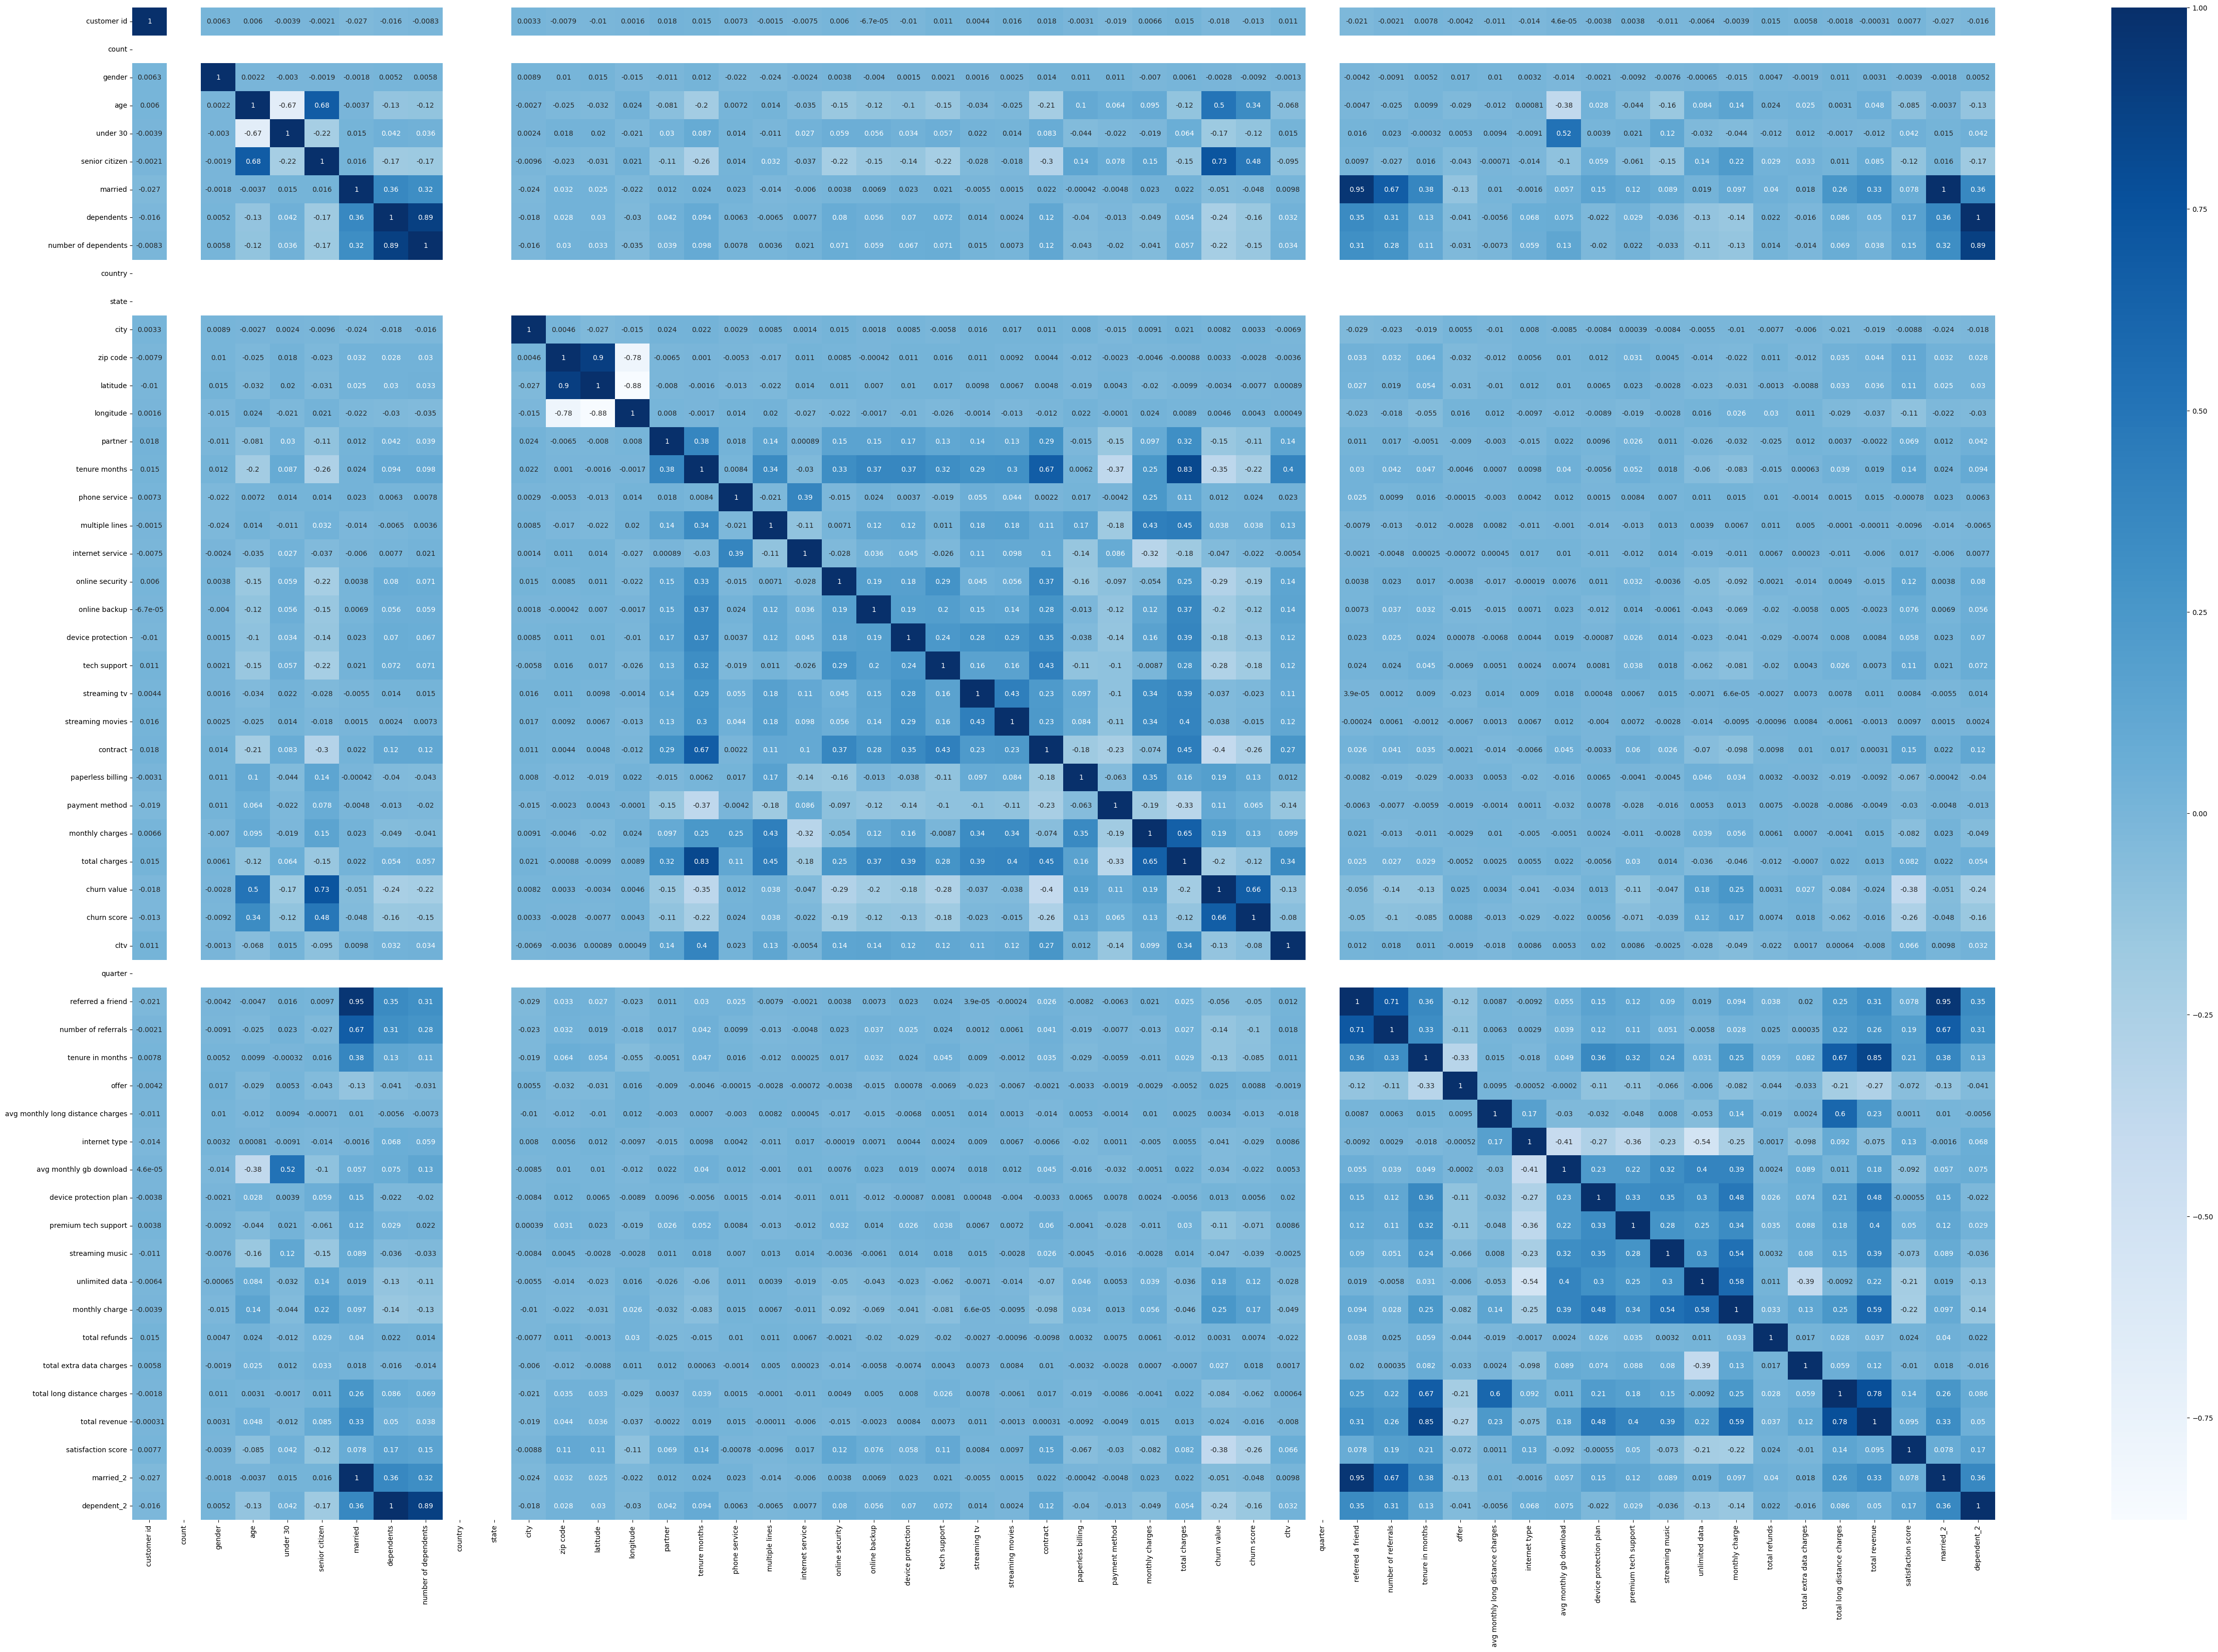

In [48]:
#Lets try feature selection by pearsons
plt.figure(figsize=(60,40),dpi=100)
sns.heatmap(x_df.corr(),annot=True,cmap='Blues')

In [49]:
cor_target=abs(x_df.corr()['churn value'])
#My threshold will be 0.11
rel_features=cor_target[cor_target>=0.1]
rel_features

age                     0.501707
under 30                0.172218
senior citizen          0.731946
dependents              0.237861
number of dependents    0.220784
partner                 0.150448
tenure months           0.352229
online security         0.289309
online backup           0.195525
device protection       0.178134
tech support            0.282492
contract                0.396713
paperless billing       0.191825
payment method          0.107062
monthly charges         0.193356
total charges           0.198324
churn value             1.000000
churn score             0.664897
cltv                    0.127463
number of referrals     0.135128
tenure in months        0.133121
premium tech support    0.114368
unlimited data          0.180948
monthly charge          0.252261
satisfaction score      0.384251
dependent_2             0.237861
Name: churn value, dtype: float64

In [168]:
final_fet=rel_features.index.drop(['churn score','dependent_2','satisfaction score','under 30'])

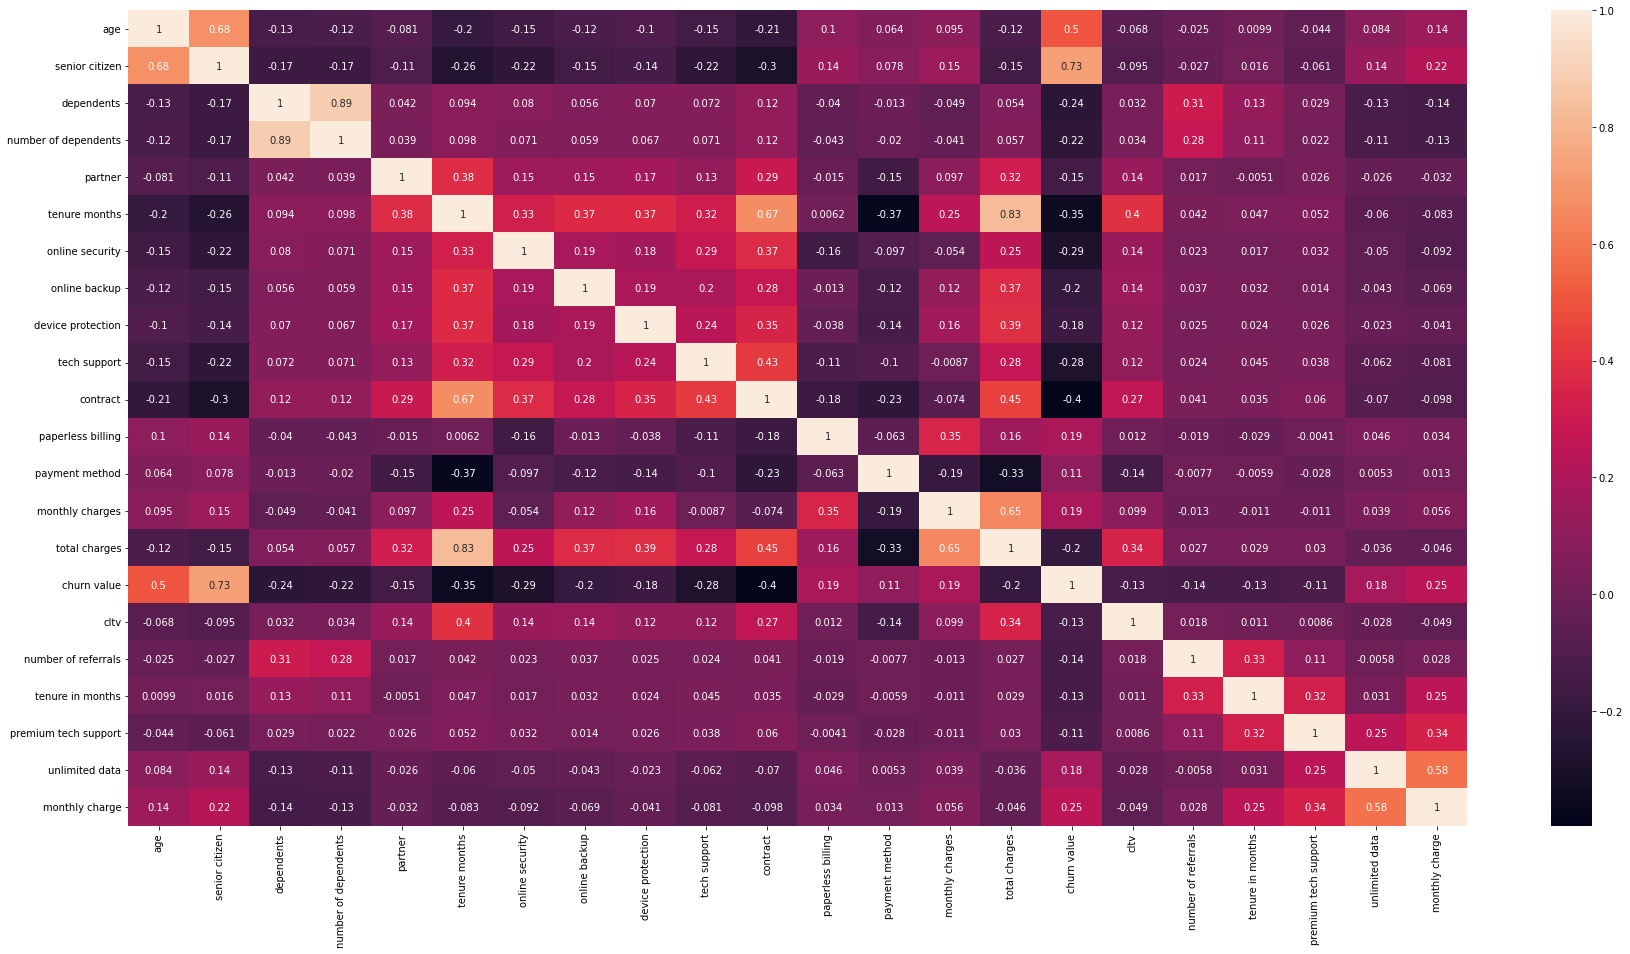

In [169]:
plt.figure(figsize=(30,15))
sns.heatmap(x_df[final_fet].corr(),annot=True)
##Drop Total_charges,Age,under30,tenure_months,total_chages,

In [57]:
['age', 'senior citizen', 'dependents', 'number of dependents',
       'partner', 'online security', 'online backup', 'device protection',
       'tech support', 'contract', 'paperless billing', 'monthly charges',
       'total charges', 'churn value', 'cltv', 'number of referrals',
       'tenure in months', 'premium tech support', 'unlimited data',
       'monthly charge']

['age',
 'senior citizen',
 'dependents',
 'number of dependents',
 'partner',
 'online security',
 'online backup',
 'device protection',
 'tech support',
 'contract',
 'paperless billing',
 'monthly charges',
 'total charges',
 'churn value',
 'cltv',
 'number of referrals',
 'tenure in months',
 'premium tech support',
 'unlimited data',
 'monthly charge']

In [58]:
##ANOVA feature selection
from sklearn.feature_selection import SelectKBest,f_classif


fs=SelectKBest(score_func=f_classif,k='all')
fs.fit(x,y)

SelectKBest(k='all')

In [59]:
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i,fs.scores_[i]))

Feature 0: 2368.456343
Feature 1: 8125.213349
Feature 2: 422.253697
Feature 3: 360.806361
Feature 4: 163.060036
Feature 5: 643.162019
Feature 6: 279.877370
Feature 7: 230.744618
Feature 8: 610.610024
Feature 9: 1315.088872
Feature 10: 268.985218
Feature 11: 273.463704
Feature 12: 288.278961
Feature 13: 116.283252
Feature 14: 130.957825
Feature 15: 127.026424
Feature 16: 93.317110
Feature 17: 997.268010
Feature 18: 238.342150
Feature 19: 478.508005


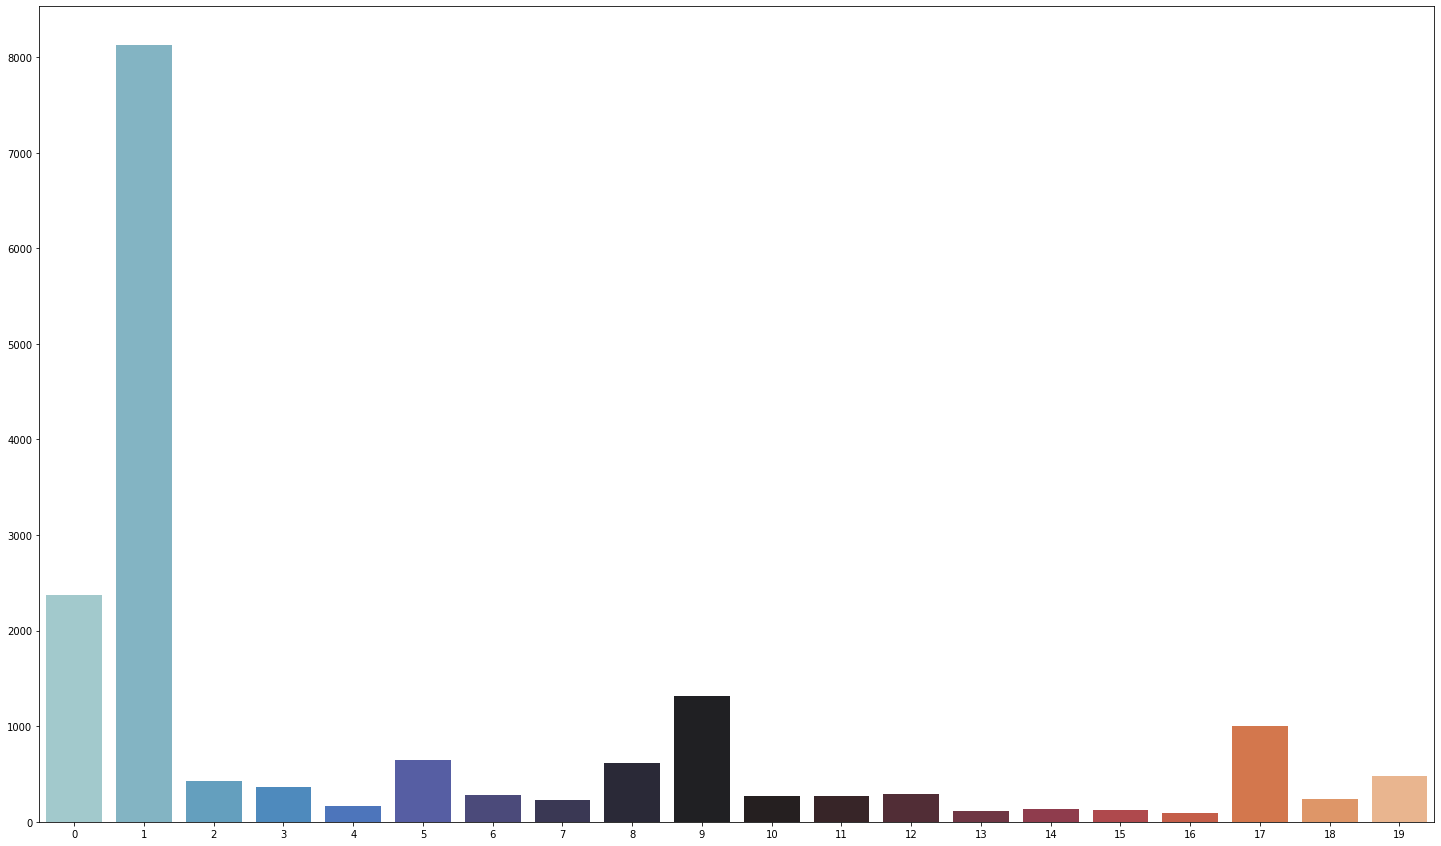

In [60]:
plt.figure(figsize=(25,15))
sns.barplot( x=[i for i in range(len(fs.scores_))], y=fs.scores_, palette='icefire')
plt.show()

In [61]:
fet_index,score=[],[]
for i in range(len(fs.scores_)):
  if fs.scores_[i]>100:
    fet_index.append(i)
    score.append(fs.scores_[i])
    print(f'Feature {i} :{fs.scores_[i]}')

Feature 0 :2368.4563433586004
Feature 1 :8125.213349085134
Feature 2 :422.253697229031
Feature 3 :360.8063611831568
Feature 4 :163.06003598399556
Feature 5 :643.1620191575773
Feature 6 :279.8773697879716
Feature 7 :230.74461843470922
Feature 8 :610.6100239408145
Feature 9 :1315.0888722077957
Feature 10 :268.9852180928093
Feature 11 :273.46370420771046
Feature 12 :288.2789610222167
Feature 13 :116.28325229237332
Feature 14 :130.9578254709973
Feature 15 :127.02642364276971
Feature 17 :997.2680104991426
Feature 18 :238.34215038635676
Feature 19 :478.5080049392641


In [62]:
fet_index

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19]

In [63]:
accepted_features=[]
for i in range(len(x_train.columns)):
  if i in fet_index:
    accepted_features.append(x_train.columns[i])
  else:
    continue

accepted_features    

['age',
 'senior citizen',
 'dependents',
 'number of dependents',
 'partner',
 'online security',
 'online backup',
 'device protection',
 'tech support',
 'contract',
 'paperless billing',
 'monthly charges',
 'total charges',
 'cltv',
 'number of referrals',
 'tenure in months',
 'tenure months',
 'unlimited data',
 'monthly charge']

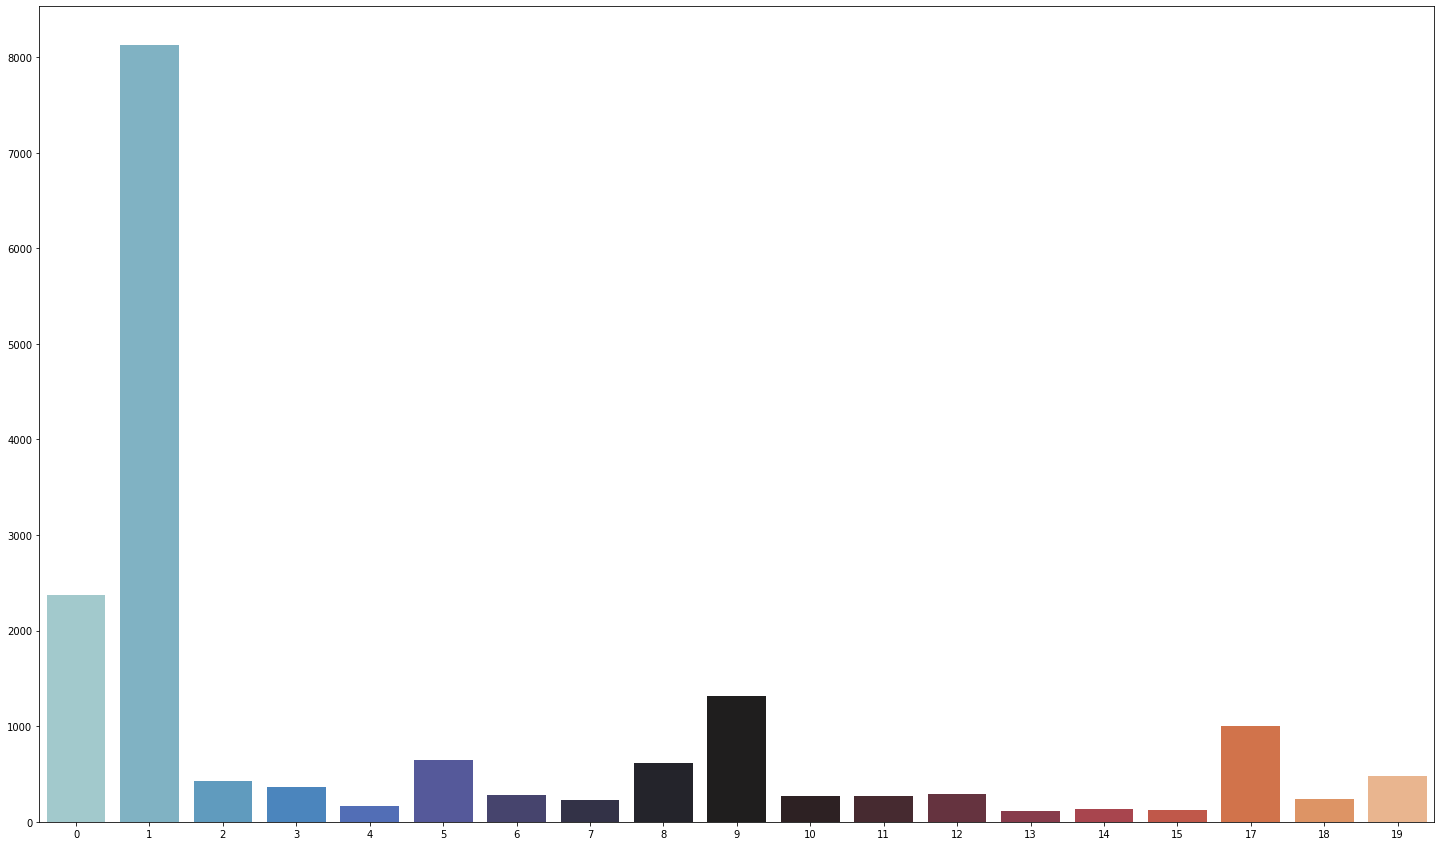

In [64]:
plt.figure(figsize=(25,15))
sns.barplot( x=fet_index, y=score, palette='icefire')
plt.show()

In [65]:
x_df[accepted_features].head()

age  senior citizen  dependents  number of dependents  partner  \
0   78               1           0                     0        0   
1   74               1           1                     1        0   
2   71               1           1                     3        0   
3   78               1           1                     1        1   
4   80               1           1                     1        0   

   online security  online backup  device protection  tech support  contract  \
0                2              2                  0             0         0   
1                0              0                  0             0         0   
2                0              0                  2             0         0   
3                0              0                  2             2         0   
4                0              2                  2             0         0   

   paperless billing  monthly charges  total charges  cltv  \
0                  1            53.85         108.15  3239   
1                  1            70.70         151.65  2701   
2                  1            99.65         820.50  5372   
3                  1           104.80        3046.05  5003   
4                  1           103.70        5036.30  5340   

   number of referrals  tenure in months  tenure months  unlimited data  \
0                    0                 1              2               0   
1                    1                 8              2               1   
2                    0                18              8               1   
3                    1                25             28               1   
4                    1                37             49               1   

   monthly charge  
0           39.65  
1           80.65  
2           95.45  
3           98.50  
4           76.50

In [66]:
#CHI2 Square feature selection
from sklearn.feature_selection import chi2

In [67]:
CAT_df=CAT_df.apply(le.fit_transform)
CAT_df.head()

customer id  gender  under 30  senior citizen  married  dependents  \
0         6207       1         0               1        0           0   
1         5305       0         0               1        1           1   
2         1129       1         0               1        0           1   
3         3208       0         0               1        1           1   
4         3419       0         0               1        1           1   

   country  state  city  partner  phone service  multiple lines  \
0        0      0   562        0              1               0   
1        0      0   562        0              1               0   
2        0      0   562        0              1               2   
3        0      0   562        1              1               2   
4        0      0   562        0              1               2   

   internet service  online security  online backup  device protection  \
0                 0                2              2                  0   
1                 1                0              0                  0   
2                 1                0              0                  2   
3                 1                0              0                  2   
4                 1                0              2                  2   

   tech support  streaming tv  streaming movies  contract  paperless billing  \
0             0             0                 0         0                  1   
1             0             0                 0         0                  1   
2             0             2                 2         0                  1   
3             2             2                 2         0                  1   
4             0             2                 2         0                  1   

   payment method  quarter  referred a friend  offer  internet type  \
0               3        0                  0      0              1   
1               2        0                  1      5              2   
2               2        0                  0      4              2   
3               2        0                  1      3              2   
4               0        0                  1      3              2   

   device protection plan  premium tech support  streaming music  \
0                       1                     0                0   
1                       0                     0                0   
2                       0                     0                1   
3                       1                     0                0   
4                       0                     0                0   

   unlimited data  
0               0  
1               1  
2               1  
3               1  
4               1

In [68]:
x_CAT=CAT_df

In [69]:
chi2=SelectKBest(chi2,k='all')
chi2.fit_transform(x_CAT,y)

array([[6207,    1,    0, ...,    0,    0,    0],
       [5305,    0,    0, ...,    0,    0,    1],
       [1129,    1,    0, ...,    0,    1,    1],
       ...,
       [1525,    0,    0, ...,    0,    1,    1],
       [3367,    0,    0, ...,    0,    0,    1],
       [2226,    1,    0, ...,    1,    1,    1]])

In [70]:
for i in range(len(chi2.scores_)):
    print(f'Feature {i} :{chi2.scores_[i]}')

Feature 0 :2787.985116518983
Feature 1 :0.027806572167404828
Feature 2 :167.3357050722746
Feature 3 :3161.4275013376127
Feature 4 :9.359848223049264
Feature 5 :306.42480035772144
Feature 6 :nan
Feature 7 :nan
Feature 8 :78.3579717207024
Feature 9 :82.41208263843043
Feature 10 :0.09726062494293952
Feature 11 :9.746920783402484
Feature 12 :9.821028234177364
Feature 13 :551.6115290655653
Feature 14 :230.08652017482268
Feature 15 :191.30313977903342
Feature 16 :523.3038660119686
Feature 17 :7.490203185152099
Feature 18 :8.235399486751872
Feature 19 :1115.7801669729258
Feature 20 :105.68086299962546
Feature 21 :58.49225048140666
Feature 22 :nan
Feature 23 :11.780681001479548
Feature 24 :10.235737399640977
Feature 25 :5.811686604555927
Feature 26 :0.786786709170314
Feature 27 :65.38708958545462
Feature 28 :10.171880057602579
Feature 29 :75.24172518237529


In [71]:
fet_index_chi,score_chi=[],[]
for i in range(len(chi2.scores_)):
  if chi2.scores_[i]>100:
    fet_index_chi.append(i)
    score_chi.append(chi2.scores_[i])
    print(f'Feature {i} :{chi2.scores_[i]}')

Feature 0 :2787.985116518983
Feature 2 :167.3357050722746
Feature 3 :3161.4275013376127
Feature 5 :306.42480035772144
Feature 13 :551.6115290655653
Feature 14 :230.08652017482268
Feature 15 :191.30313977903342
Feature 16 :523.3038660119686
Feature 19 :1115.7801669729258
Feature 20 :105.68086299962546


In [72]:
fet_index_chi

[0, 2, 3, 5, 13, 14, 15, 16, 19, 20]

In [73]:
accepted_features_chi2=[]
for i in range(len(x_CAT.columns)):
  if i in fet_index_chi:
    accepted_features_chi2.append(x_CAT.columns[i])
  else:
    continue

accepted_features_chi2    

['customer id',
 'under 30',
 'senior citizen',
 'dependents',
 'online security',
 'online backup',
 'device protection',
 'tech support',
 'contract',
 'paperless billing']

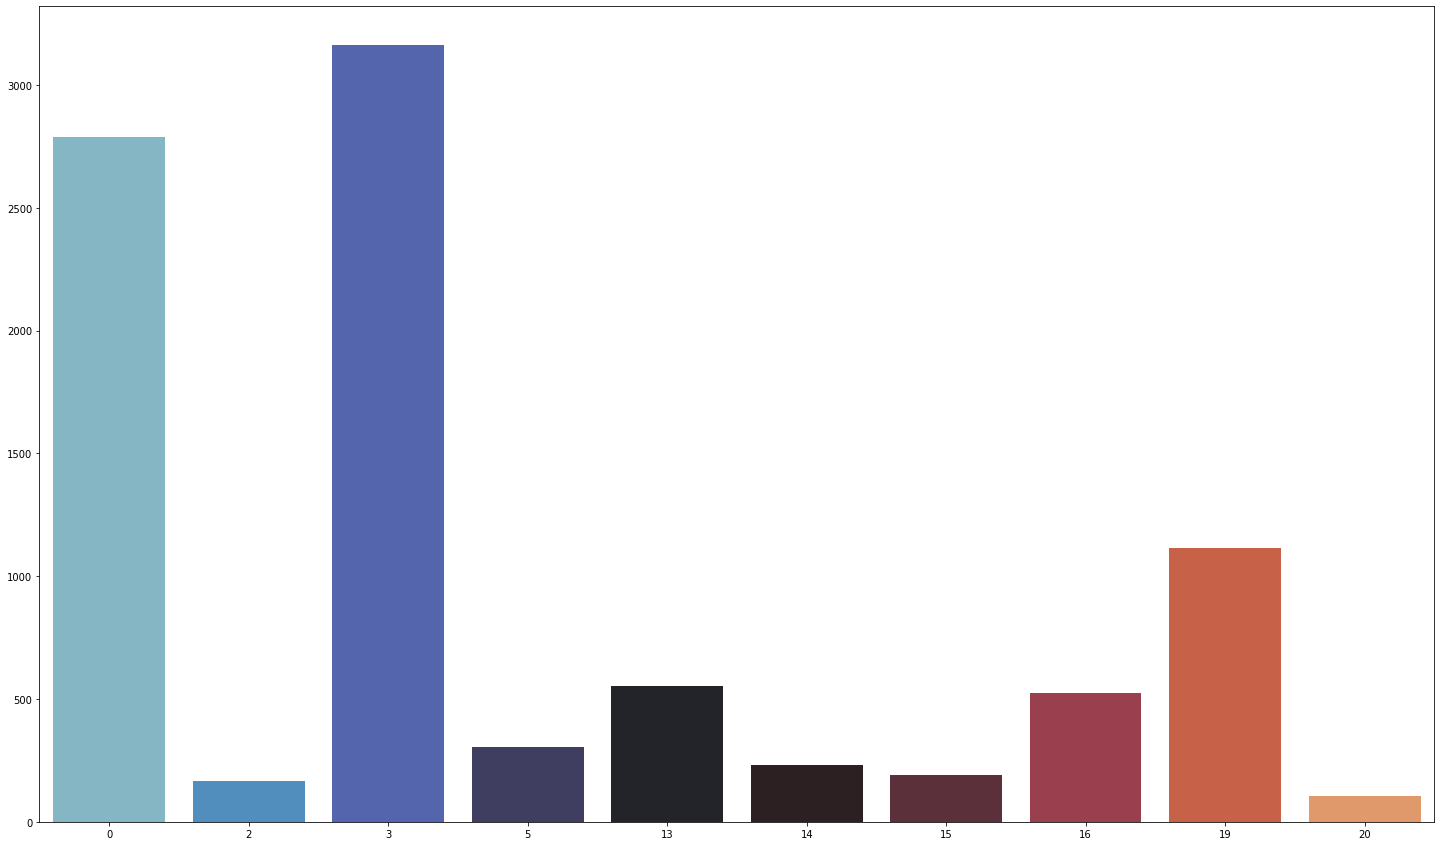

In [74]:
plt.figure(figsize=(25,15))
sns.barplot( x=fet_index_chi, y=score_chi, palette='icefire')
plt.show()

In [75]:
from sklearn.feature_selection import mutual_info_classif
mutual_information=SelectKBest(mutual_info_classif,k='all')
mutual_information.fit_transform(x_CAT,y)

array([[6207,    1,    0, ...,    0,    0,    0],
       [5305,    0,    0, ...,    0,    0,    1],
       [1129,    1,    0, ...,    0,    1,    1],
       ...,
       [1525,    0,    0, ...,    0,    1,    1],
       [3367,    0,    0, ...,    0,    0,    1],
       [2226,    1,    0, ...,    1,    1,    1]])

In [76]:
for i in range(len(mutual_information.scores_)):
    print(f'Feature {i} :{mutual_information.scores_[i]*100}')

Feature 0 :0.2193123641600403
Feature 1 :1.1842851217170436
Feature 2 :1.3807564488708346
Feature 3 :26.816575286381262
Feature 4 :0.0
Feature 5 :3.0869742884928275
Feature 6 :0.10224860379079992
Feature 7 :0.0
Feature 8 :1.022367024960058
Feature 9 :1.1973056331788356
Feature 10 :0.12117533621938126
Feature 11 :0.0
Feature 12 :6.455155200428275
Feature 13 :7.170304936249483
Feature 14 :4.767353677025699
Feature 15 :3.6234337964185848
Feature 16 :7.2685868151592725
Feature 17 :4.0059065619113765
Feature 18 :2.766300514759057
Feature 19 :10.303915481755643
Feature 20 :2.0989240725227454
Feature 21 :5.392696469378366
Feature 22 :0.05388070881124918
Feature 23 :0.4837728156169119
Feature 24 :0.8423619956966721
Feature 25 :6.19968779012765
Feature 26 :0.0
Feature 27 :0.9217650731223159
Feature 28 :0.0
Feature 29 :2.0032256869036535


#ML Models

In [267]:
from sklearn.linear_model import LogisticRegression
log_reg_init=LogisticRegression(C=1, class_weight='None', random_state=42)
log_reg_init.fit(x_train,y_train)

LogisticRegression(C=1, class_weight='None', random_state=42)

In [268]:
ypred_log=log_reg_init.predict(x_test)

In [269]:
from sklearn import metrics
recall=metrics.recall_score(y_test,ypred_log)
precision=metrics.precision_score(y_test,ypred_log)
f1=metrics.f1_score(y_test,ypred_log)
acc=metrics.accuracy_score(y_test,ypred_log)
print(f'Model Accuracy = {100*acc:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1:0.3} %' )

Model Accuracy = 91.3 %
Model recall = 76.4 %
Model precision = 87.5 %
Model f1_score = 81.6 %


In [277]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=65, random_state=42)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=65, random_state=42)

In [278]:
ypred_rf=rf.predict(x_test)

In [279]:
recall=metrics.recall_score(y_test,ypred_rf)
precision=metrics.precision_score(y_test,ypred_rf)
f1=metrics.f1_score(y_test,ypred_rf)
acc=metrics.accuracy_score(y_test,ypred_rf)
print(f'Model Accuracy = {100*acc:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1:0.3} %' )

Model Accuracy = 91.8 %
Model recall = 74.2 %
Model precision = 91.6 %
Model f1_score = 82.0 %


[[1547   36]
 [ 137  393]]


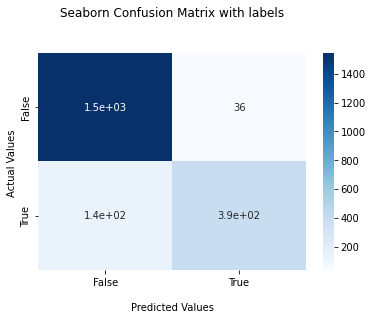

In [280]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix_rf = confusion_matrix(y_test,ypred_rf)


print(cf_matrix_rf)

import seaborn as sns

ax = sns.heatmap(cf_matrix_rf, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [92]:
#Model Accuracy = 92.1 %
#Model recall = 74.7 %
#Model precision = 92.5 %
#Model f1_score = 82.7 %

In [227]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier()

In [228]:
ypred_xgb=xgb.predict(x_test)

In [229]:
recall=metrics.recall_score(y_test,ypred_xgb)
precision=metrics.precision_score(y_test,ypred_xgb)
f1=metrics.f1_score(y_test,ypred_xgb)
acc=metrics.accuracy_score(y_test,ypred_xgb)
print(f'Model Accuracy = {100*acc:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1:0.3} %' )

Model Accuracy = 92.0 %
Model recall = 76.4 %
Model precision = 90.2 %
Model f1_score = 82.7 %


In [233]:
from sklearn import svm
svm_model=svm.SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [234]:
ypred_svm=svm_model.predict(x_test)

In [235]:
recall=metrics.recall_score(y_test,ypred_svm)
precision=metrics.precision_score(y_test,ypred_svm)
f1=metrics.f1_score(y_test,ypred_svm)
acc=metrics.accuracy_score(y_test,ypred_svm)
print(f'Model Accuracy = {100*acc:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1:0.3} %' )

Model Accuracy = 91.9 %
Model recall = 75.1 %
Model precision = 91.1 %
Model f1_score = 82.3 %


In [311]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [312]:
ypred_knn=knn.predict(x_test)

In [313]:
recall=metrics.recall_score(y_test,ypred_knn)
precision=metrics.precision_score(y_test,ypred_knn)
f1=metrics.f1_score(y_test,ypred_knn)
acc=metrics.accuracy_score(y_test,ypred_knn)
print(f'Model Accuracy = {100*acc:0.3} %' )
print(f'Model recall = {100*recall:0.3} %' )
print(f'Model precision = {100*precision:0.3} %' )
print(f'Model f1_score = {100*f1:0.3} %' )

Model Accuracy = 89.3 %
Model recall = 73.4 %
Model precision = 81.9 %
Model f1_score = 77.4 %


#Resampling Data

In [77]:
df['churn value'].value_counts()

0    5174
1    1869
Name: churn value, dtype: int64

In [78]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter
smote=SMOTE(random_state=1)
x_smot,y_smot=smote.fit_resample(x_train,y_train)
print(f'before resample {Counter(y_train)}')
print(f'after resample {Counter(y_smot)}')

before resample Counter({0: 3591, 1: 1339})
after resample Counter({0: 3591, 1: 3591})


In [79]:
rov=RandomOverSampler(random_state=1)
x_rov,y_rov=rov.fit_resample(x_train,y_train)
print(f'before resample {Counter(y_train)}')
print(f'after resample {Counter(y_rov)}')

before resample Counter({0: 3591, 1: 1339})
after resample Counter({0: 3591, 1: 3591})


In [80]:
from imblearn.under_sampling import TomekLinks,RandomUnderSampler
rus=RandomUnderSampler(random_state=1)
x_rus,y_rus=rus.fit_resample(x_train,y_train)
print(f'before resample {Counter(y_train)}')
print(f'after resample {Counter(y_rus)}')

before resample Counter({0: 3591, 1: 1339})
after resample Counter({0: 1339, 1: 1339})


In [81]:
TL=TomekLinks()
x_tl,y_tl=TL.fit_resample(x_train,y_train)
print(f'before resample {Counter(y_train)}')
print(f'after resample {Counter(y_tl)}')

before resample Counter({0: 3591, 1: 1339})
after resample Counter({0: 3201, 1: 1339})


#Testing resampled data on different ML models


In [241]:
rf_smot=RandomForestClassifier()
rf_rov=RandomForestClassifier()
rf_rus=RandomForestClassifier()
rf_TL=RandomForestClassifier()

In [242]:
rf_smot.fit(x_smot,y_smot)
rf_rov.fit(x_rov,y_rov)
rf_rus.fit(x_rus,y_rus)
rf_TL.fit(x_tl,y_tl)

RandomForestClassifier()

In [243]:
ypred_rf_smot=rf_smot.predict(x_test)
ypred_rf_rov=rf_rov.predict(x_test)
ypred_rf_rus=rf_rus.predict(x_test)
ypred_rf_TL=rf_TL.predict(x_test)

In [244]:
ypred_proba_RF_rov=rf_smot.predict_proba(x_test)[:,1]
ypred_proba_RF_smot=rf_rov.predict_proba(x_test)[:,1]
ypred_proba_RF_rus=rf_rus.predict_proba(x_test)[:,1]
ypred_proba_RF_TL=rf_TL.predict_proba(x_test)[:,1]

In [245]:
print("ROV")
recall=metrics.recall_score(y_test,ypred_rf_rov)
precision=metrics.precision_score(y_test,ypred_rf_rov)
f1=metrics.f1_score(y_test,ypred_rf_rov)
acc=metrics.accuracy_score(y_test,ypred_rf_rov)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'% \n')
#############################################
print("SMOT")
recall=metrics.recall_score(y_test,ypred_rf_smot)
precision=metrics.precision_score(y_test,ypred_rf_smot)
f1=metrics.f1_score(y_test,ypred_rf_smot)
acc=metrics.accuracy_score(y_test,ypred_rf_smot)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'% \n')
###############################################
print("RUS")
recall=metrics.recall_score(y_test,ypred_rf_rus)
precision=metrics.precision_score(y_test,ypred_rf_rus)
f1=metrics.f1_score(y_test,ypred_rf_rus)
acc=metrics.accuracy_score(y_test,ypred_rf_rus)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'%\n')
####################################################
print("TL")
recall=metrics.recall_score(y_test,ypred_rf_TL)
precision=metrics.precision_score(y_test,ypred_rf_TL)
f1=metrics.f1_score(y_test,ypred_rf_TL)
acc=metrics.accuracy_score(y_test,ypred_rf_TL)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'%\n')

ROV
recall =  60.566 %
precision =  99.6894 %
f1 =  75.3521 %
accuracy =  90.0615 % 

SMOT
recall =  59.8113 %
precision =  100.0 %
f1 =  74.8524 %
accuracy =  89.9195 % 

RUS
recall =  77.5472 %
precision =  72.4868 %
f1 =  74.9316 %
accuracy =  86.9853 %

TL
recall =  67.1698 %
precision =  86.8293 %
f1 =  75.7447 %
accuracy =  89.2097 %



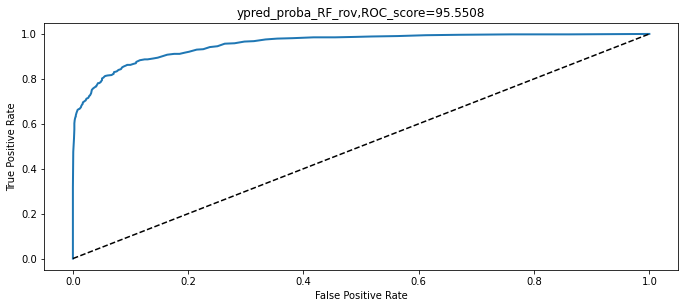

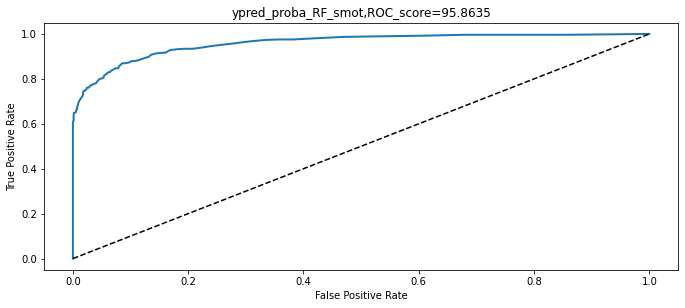

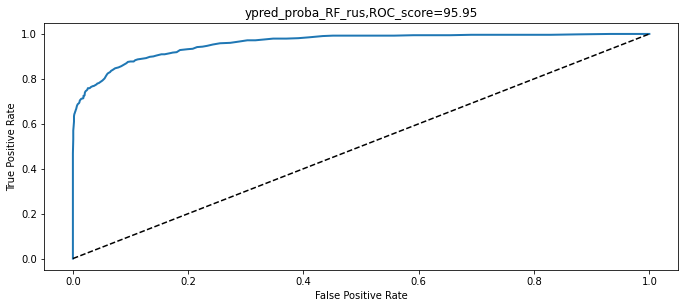

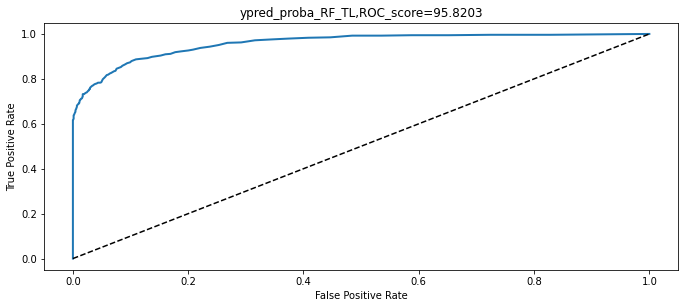

In [101]:
z2={'ypred_proba_RF_rov':ypred_proba_RF_rov,'ypred_proba_RF_smot':ypred_proba_RF_smot,'ypred_proba_RF_rus':ypred_proba_RF_rus,'ypred_proba_RF_TL':ypred_proba_RF_TL}
for i,key in enumerate(z2):
  plt.figure(figsize=(25,10))
  fpr,tpr,thresholds=metrics.roc_curve(y_test,z2[key])
  score=metrics.roc_auc_score(y_test,z2[key])
  ax=plt.subplot(2,2,i+1)
  ax=plt.plot(fpr,tpr,linewidth=2)
  ax=plt.plot([0,1],[0,1],'k--')
  plt.title(f'{str(key)},ROC_score={round(score*100,4)}')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.show()


ypred_rf_rov 
 [[1533   50]
 [ 121  409]] 

ypred_rf_smot 
 [[1497   86]
 [ 101  429]] 

ypred_rf_rus 
 [[1458  125]
 [  79  451]] 

ypred_rf_TL 
 [[1531   52]
 [ 123  407]] 



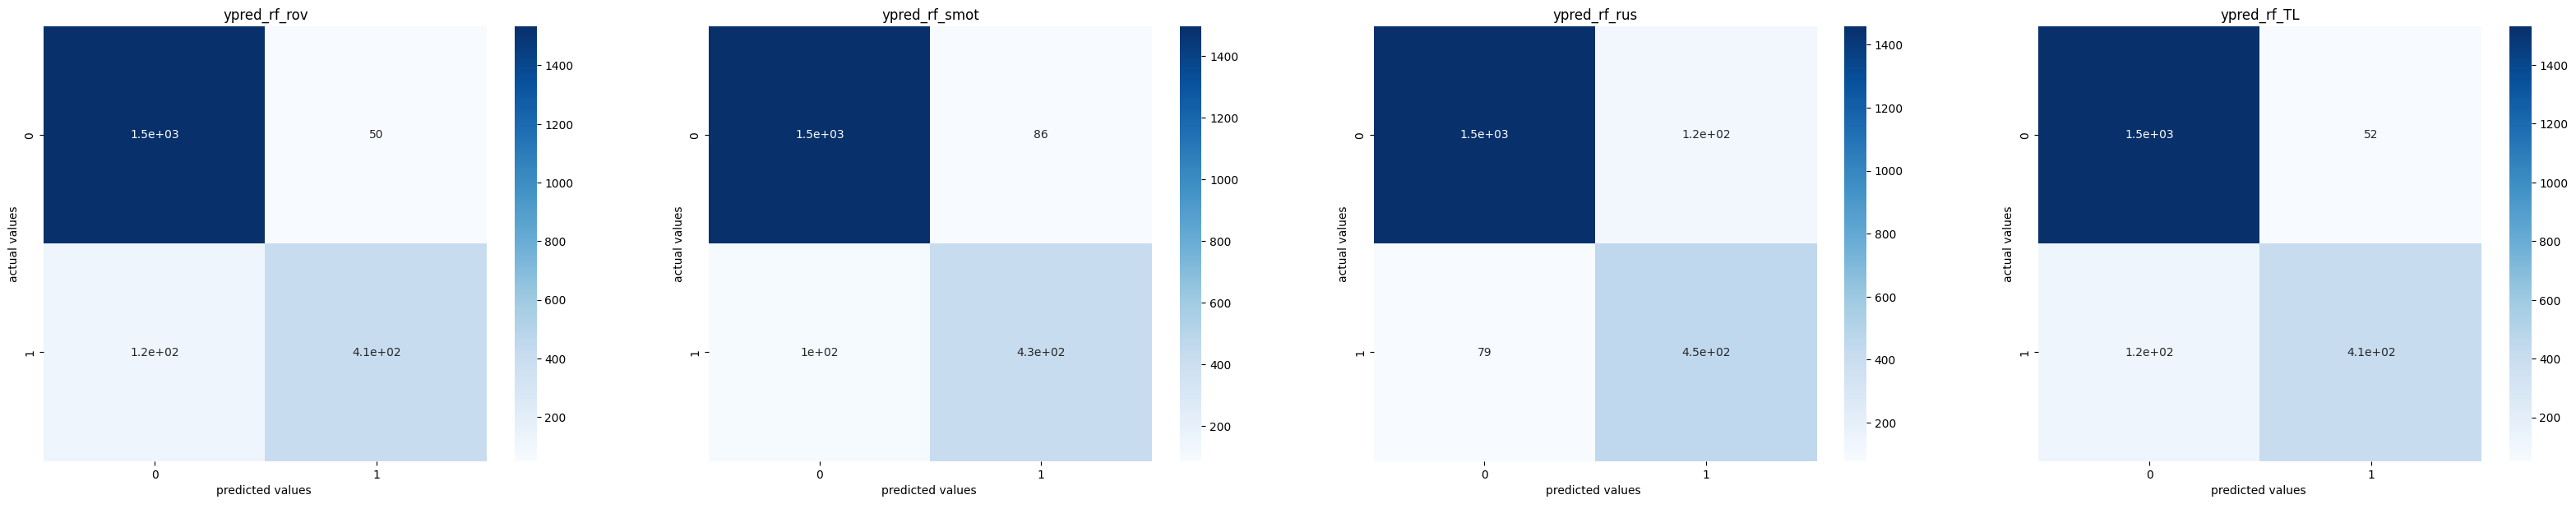

In [102]:
z={'ypred_rf_rov':ypred_rf_rov,'ypred_rf_smot':ypred_rf_smot,'ypred_rf_rus':ypred_rf_rus,'ypred_rf_TL':ypred_rf_TL}
plt.figure(figsize=(40,7),dpi=100)
for i,key in enumerate(z):
  cf_matrix=metrics.confusion_matrix(y_test,z[key])
  print(key,'\n',cf_matrix,'\n')
  ax=plt.subplot(1,4,i+1)
  ax=sns.heatmap(cf_matrix,annot=True,cmap='Blues')
  ax.set_title(str(key))
  ax.set_xlabel('predicted values \n')
  ax.set_ylabel('actual values')

In [133]:
xgb_rov=XGBClassifier()
xgb_smot=XGBClassifier()
xgb_rus=XGBClassifier()
xgb_TL=XGBClassifier()

In [134]:
xgb_rov.fit(x_rov,y_rov)
xgb_smot.fit(x_smot,y_smot)
xgb_rus.fit(x_rus,y_rus)
xgb_TL.fit(x_tl,y_tl)

XGBClassifier()

In [135]:
ypred_xgb_rov=xgb_rov.predict(x_test)
ypred_xgb_smot=xgb_smot.predict(x_test)
ypred_xgb_rus=xgb_rus.predict(x_test)
ypred_xgb_TL=xgb_TL.predict(x_test)

In [136]:
print("ROV")
recall=metrics.recall_score(y_test,ypred_xgb_rov)
precision=metrics.precision_score(y_test,ypred_xgb_rov)
f1=metrics.f1_score(y_test,ypred_xgb_rov)
acc=metrics.accuracy_score(y_test,ypred_xgb_rov)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'% \n')
#############################################
print("SMOT")
recall=metrics.recall_score(y_test,ypred_xgb_smot)
precision=metrics.precision_score(y_test,ypred_xgb_smot)
f1=metrics.f1_score(y_test,ypred_xgb_smot)
acc=metrics.accuracy_score(y_test,ypred_xgb_smot)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'% \n')
###############################################
print("RUS")
recall=metrics.recall_score(y_test,ypred_xgb_rus)
precision=metrics.precision_score(y_test,ypred_xgb_rus)
f1=metrics.f1_score(y_test,ypred_xgb_rus)
acc=metrics.accuracy_score(y_test,ypred_xgb_rus)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'%\n')
####################################################
print("TL")
recall=metrics.recall_score(y_test,ypred_xgb_TL)
precision=metrics.precision_score(y_test,ypred_xgb_TL)
f1=metrics.f1_score(y_test,ypred_xgb_TL)
acc=metrics.accuracy_score(y_test,ypred_xgb_TL)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'%\n')

ROV
recall =  85.8491 %
precision =  78.4483 %
f1 =  81.982 %
accuracy =  90.5348 % 

SMOT
recall =  84.1509 %
precision =  77.836 %
f1 =  80.8704 %
accuracy =  90.0142 % 

RUS
recall =  87.5472 %
precision =  74.7182 %
f1 =  80.6255 %
accuracy =  89.4463 %

TL
recall =  79.6226 %
precision =  87.1901 %
f1 =  83.2347 %
accuracy =  91.9546 %



ypred_xgb_rov 
 [[1458  125]
 [  75  455]] 

ypred_xgb_smot 
 [[1456  127]
 [  84  446]] 

ypred_xgb_rus 
 [[1426  157]
 [  66  464]] 

ypred_xgb_TL 
 [[1521   62]
 [ 108  422]] 



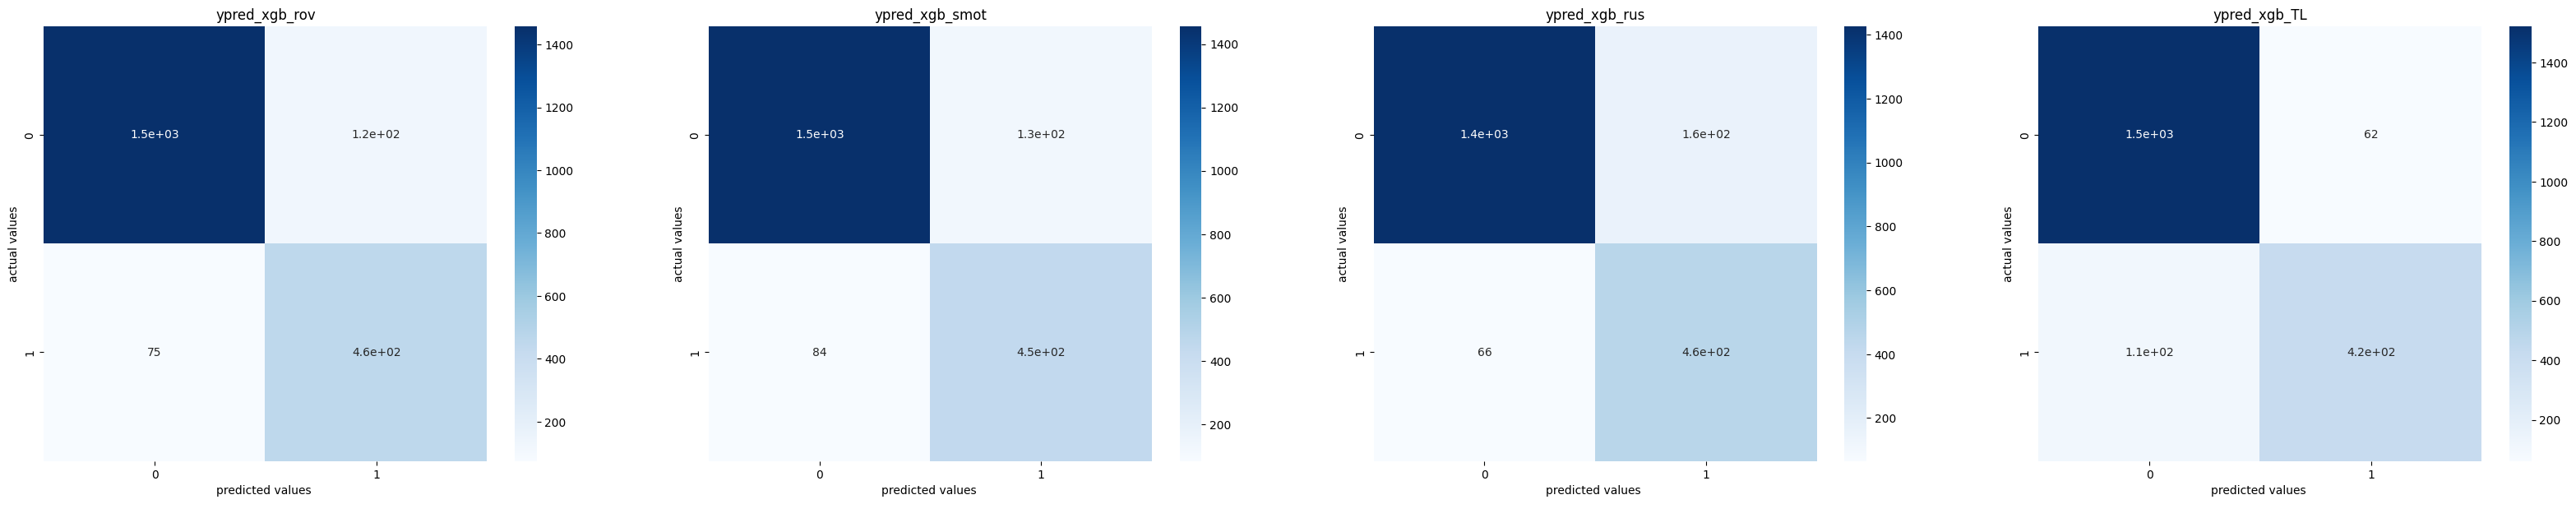

In [107]:
z={'ypred_xgb_rov':ypred_xgb_rov,'ypred_xgb_smot':ypred_xgb_smot,'ypred_xgb_rus':ypred_xgb_rus,'ypred_xgb_TL':ypred_xgb_TL}
plt.figure(figsize=(40,7),dpi=100)
for i,key in enumerate(z):
  cf_matrix=metrics.confusion_matrix(y_test,z[key])
  print(key,'\n',cf_matrix,'\n')
  ax=plt.subplot(1,4,i+1)
  ax=sns.heatmap(cf_matrix,annot=True,cmap='Blues')
  ax.set_title(str(key))
  ax.set_xlabel('predicted values \n')
  ax.set_ylabel('actual values')

#Hyper tunning for models best parameters:
we wil use GridSearchCV to find best parameters for our ML models

In [281]:
param_grid_RF = { 
    'n_estimators': [200, 500,1000],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,9,10,11,12],
    'criterion' :['gini', 'entropy']
}

In [140]:
from sklearn.model_selection import GridSearchCV
rf_tun=RandomForestClassifier()
g_search_rf=GridSearchCV(estimator=rf_tun,param_grid=param_grid_RF,cv=5)
g_search_rf.fit(x_train,y_train)

In [ ]:
print(g_search_rf.best_estimator_)

RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=1000)


In [123]:
rf_tunned=RandomForestClassifier(max_depth=12, max_features='log2', n_estimators=100)
rf_tunned.fit(x_train,y_train)
ypred_rf_tunned=rf_tunned.predict(x_test)

In [124]:
print("tunned_RF")
recall=metrics.recall_score(y_test,ypred_rf_tunned)
precision=metrics.precision_score(y_test,ypred_rf_tunned)
f1=metrics.f1_score(y_test,ypred_rf_tunned)
acc=metrics.accuracy_score(y_test,ypred_rf_tunned)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'% \n')

tunned_RF
recall =  73.9623 %
precision =  92.4528 %
f1 =  82.1803 %
accuracy =  91.9546 % 



In [141]:
param_xgboost = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [142]:
xgb_tun=XGBClassifier()
g_search_xgb=GridSearchCV(estimator=xgb_tun,param_grid=param_xgboost,cv=5)
g_search_xgb.fit(x_tl,y_tl)

GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5], 'max_depth': [3, 4, 5],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]})

In [143]:
print(g_search_xgb.best_estimator_)

XGBClassifier(colsample_bytree=0.8, gamma=1, min_child_weight=5, subsample=1.0)


In [291]:
xgb_tunned=XGBClassifier(colsample_bytree=0.8, gamma=1, min_child_weight=5, subsample=1.0)
xgb_tunned.fit(x_train,y_train)
ypred_xgb_tunned=xgb_tunned.predict(x_test)

In [292]:
print("tunned_xgb")
recall=metrics.recall_score(y_test,ypred_xgb_tunned)
precision=metrics.precision_score(y_test,ypred_xgb_tunned)
f1=metrics.f1_score(y_test,ypred_xgb_tunned)
acc=metrics.accuracy_score(y_test,ypred_xgb_tunned)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'% \n')

tunned_xgb
recall =  76.2264 %
precision =  89.9777 %
f1 =  82.5332 %
accuracy =  91.9072 % 



[[1537   46]
 [ 123  407]]


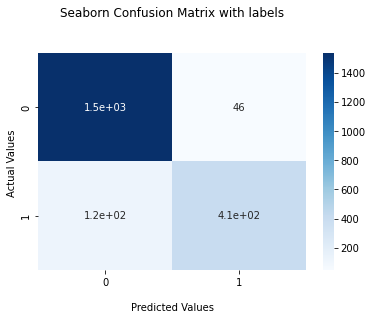

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix_xgb_tun = confusion_matrix(y_test,ypred_xgb_tunned)


print(cf_matrix_xgb_tun)

import seaborn as sns

ax = sns.heatmap(cf_matrix_xgb_tun, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order

## Display the visualization of the Confusion Matrix.
plt.show()

In [ ]:
cf_matrix_rf

In [ ]:
param_grid_svm={'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'max_iter':[10,50,100,200,500,-1,1000,2000]
    
}

In [314]:
#svm_tun=svm.SVC()
#g_search_svm=GridSearchCV(estimator=svm_tun,param_grid=param_grid_svm,cv=5)
#g_search_svm.fit(x_train,y_train)

In [ ]:
#print(g_search_svm.best_estimator_)

In [ ]:
log_regtun=LogisticRegression(solver='lbfgs')
log_regtun.fit(x_train,y_train)
ypred_logreg_tun=log_regtun.predict(x_test)
recall=metrics.recall_score(y_test,ypred_logreg_tun)
print('recall = ',round(recall*100,4),'%')

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
proba=log_regtun.predict_proba(x_test)

array([[0.8565471 , 0.1434529 ],
       [0.90736404, 0.09263596],
       [0.99795029, 0.00204971],
       ...,
       [0.97573261, 0.02426739],
       [0.74893424, 0.25106576],
       [0.9559232 , 0.0440768 ]])

In [ ]:
prob=proba[:,1]

In [ ]:
thresholds=np.arange(0,1,0.001)

In [ ]:
# apply threshold to positive probabilities to create labels
def to_labels(pos_probs, thresholds):
	return (pos_probs >= thresholds).astype('int')

In [ ]:
scores = [metrics.recall_score(y_test, to_labels(prob, t)) for t in thresholds]

<function matplotlib.pyplot.show(*args, **kw)>

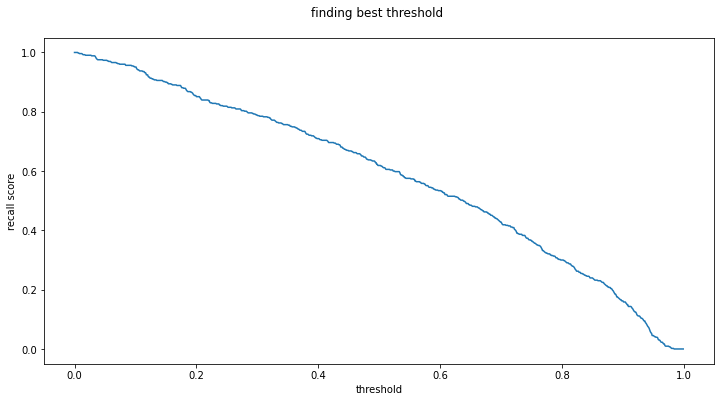

In [ ]:
plt.figure(figsize=(12,6))
ax=plt.plot([t for t in thresholds],[i for i in scores])
plt.title('finding best threshold \n')
plt.xlabel('threshold')
plt.ylabel('recall score')
plt.show

In [ ]:
desicions=(log_regtun.predict_proba(x_test)>=0.5).astype(int)[:,1]

recall=metrics.recall_score(y_test,desicions)
precision=metrics.precision_score(y_test,desicions)
f1=metrics.f1_score(y_test,desicions)
acc=metrics.accuracy_score(y_test,desicions)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'% \n')

recall =  61.8868 %
precision =  67.0757 %
f1 =  64.3768 %
accuracy =  82.8206 % 



[[1109  474]
 [  79  451]]


Text(33.0, 0.5, 'actual values')

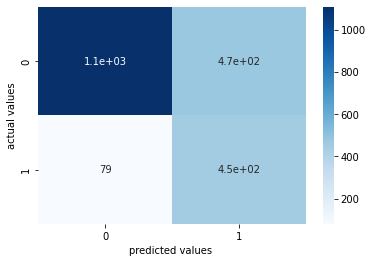

In [ ]:
cf_matrix_logreg_tun=metrics.confusion_matrix(y_test,desicions)
print(cf_matrix_logreg_tun)
ax=sns.heatmap(cf_matrix_logreg_tun,annot=True,cmap='Blues')
ax.set_xlabel('predicted values \n')
ax.set_ylabel('actual values')

#Staking and Bagging multiple models

In [338]:
from sklearn.ensemble import VotingClassifier
final_model1=VotingClassifier(estimators=[('rf',rf),('rf_rov',rf_rov),('xgb_rus',xgb_rus),('xgb_TL',xgb_TL)],
                              weights=[1,1,1,2]
    
)
final_model1.fit(x_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=65,
                                                     random_state=42)),
                             ('rf_rov', RandomForestClassifier()),
                             ('xgb_rus', XGBClassifier()),
                             ('xgb_TL', XGBClassifier())],
                 weights=[1, 1, 1, 2])

In [339]:
ypred_final=final_model1.predict(x_test)

In [340]:
recall=metrics.recall_score(y_test,ypred_final)
precision=metrics.precision_score(y_test,ypred_final)
f1=metrics.f1_score(y_test,ypred_final)
acc=metrics.accuracy_score(y_test,ypred_final)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'%\n')

recall =  76.4151 %
precision =  90.2004 %
f1 =  82.7375 %
accuracy =  92.0019 %



In [319]:
from sklearn.ensemble import VotingClassifier
final_model2=VotingClassifier(estimators=[('rf',rf),('xgb',xgb),('logreg',log_reg_init),('svm',svm_model),('knn',knn)]
    
)
final_model2.fit(x_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=65,
                                                     random_state=42)),
                             ('xgb', XGBClassifier()),
                             ('logreg',
                              LogisticRegression(C=1, class_weight='None',
                                                 random_state=42)),
                             ('svm', SVC(kernel='linear')),
                             ('knn', KNeighborsClassifier(n_neighbors=7))])

In [320]:
ypred_final2=final_model2.predict(x_test)

In [321]:
recall=metrics.recall_score(y_test,ypred_final2)
precision=metrics.precision_score(y_test,ypred_final2)
f1=metrics.f1_score(y_test,ypred_final2)
acc=metrics.accuracy_score(y_test,ypred_final2)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'%\n')

recall =  76.2264 %
precision =  90.3803 %
f1 =  82.7021 %
accuracy =  92.0019 %



In [334]:
from sklearn.ensemble import StackingClassifier
stack_model=StackingClassifier(estimators=[('rf',rf),('xgb',xgb),('logreg',log_reg_init),('svm',svm_model),('knn',knn)])
stack_model.fit(x_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=65,
                                                       random_state=42)),
                               ('xgb', XGBClassifier()),
                               ('logreg',
                                LogisticRegression(C=1, class_weight='None',
                                                   random_state=42)),
                               ('svm', SVC(kernel='linear')),
                               ('knn', KNeighborsClassifier(n_neighbors=7))])

In [335]:
ypred_stack=stack_model.predict(x_test)

In [336]:
recall=metrics.recall_score(y_test,ypred_stack)
precision=metrics.precision_score(y_test,ypred_stack)
f1=metrics.f1_score(y_test,ypred_stack)
acc=metrics.accuracy_score(y_test,ypred_stack)
print('recall = ',round(recall*100,4),'%')
print('precision = ',round(precision*100,4),'%')
print('f1 = ',round(f1*100,4),'%')
print('accuracy = ',round(acc*100,4),'%\n')

recall =  78.1132 %
precision =  88.651 %
f1 =  83.0491 %
accuracy =  92.0019 %



final_model1 
 [[1539   44]
 [ 125  405]] 

final_model2 
 [[1540   43]
 [ 126  404]] 

stack_model 
 [[1530   53]
 [ 116  414]] 



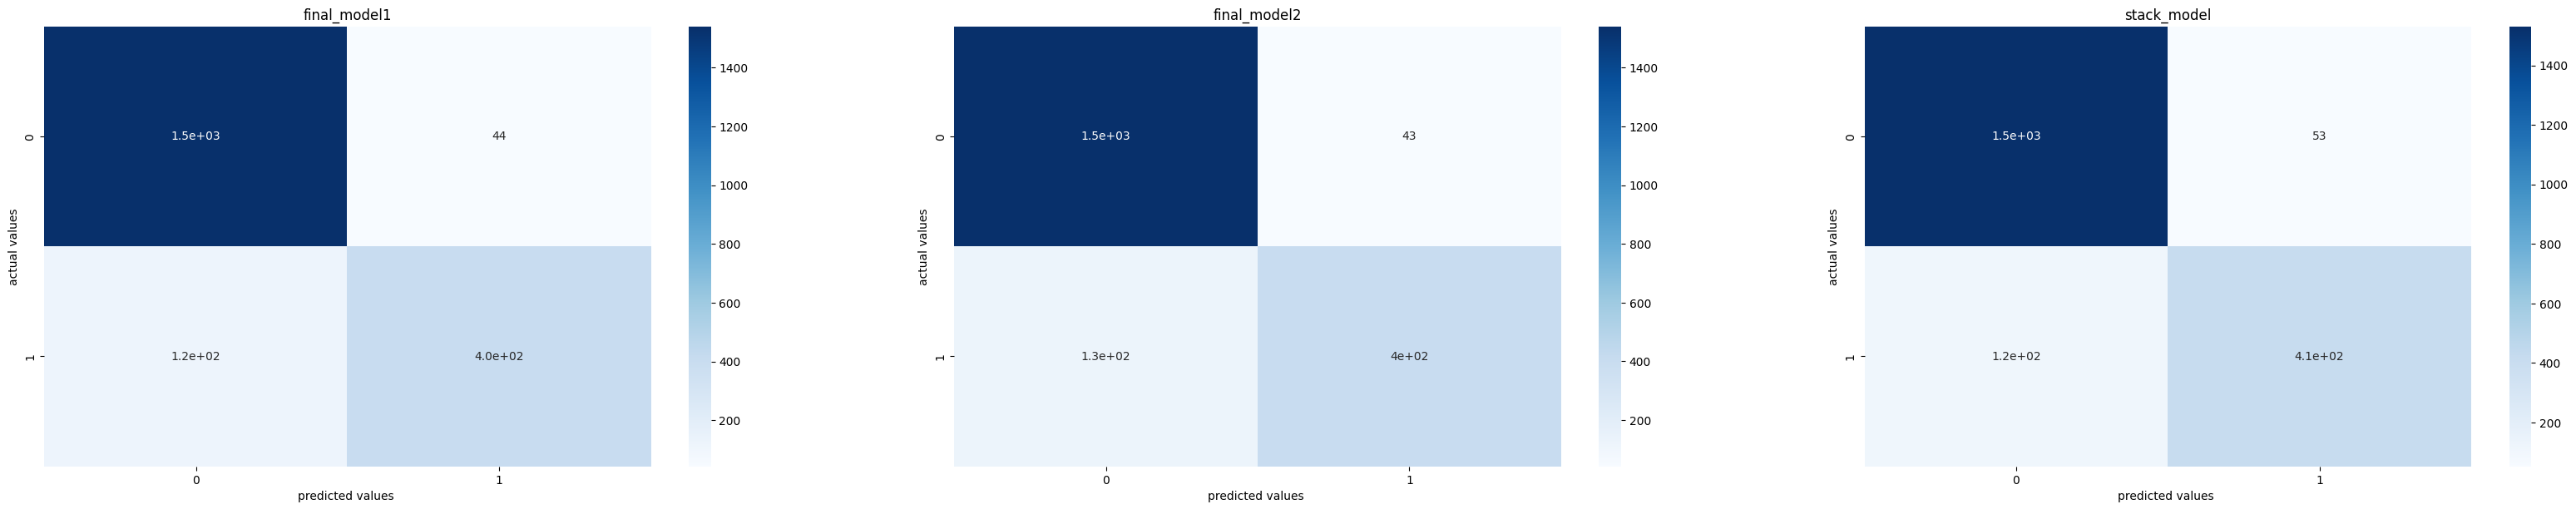

In [345]:
z={'final_model1':ypred_final,'final_model2':ypred_final2,'stack_model':ypred_stack}
plt.figure(figsize=(40,7),dpi=100)
for i,key in enumerate(z):
  cf_matrix=metrics.confusion_matrix(y_test,z[key])
  print(key,'\n',cf_matrix,'\n')
  ax=plt.subplot(1,3,i+1)
  ax=sns.heatmap(cf_matrix,annot=True,cmap='Blues')
  ax.set_title(str(key))
  ax.set_xlabel('predicted values \n')
  ax.set_ylabel('actual values')

In [351]:
ypred_proba_stack=stack_model.predict_proba(x_test)[:,1]

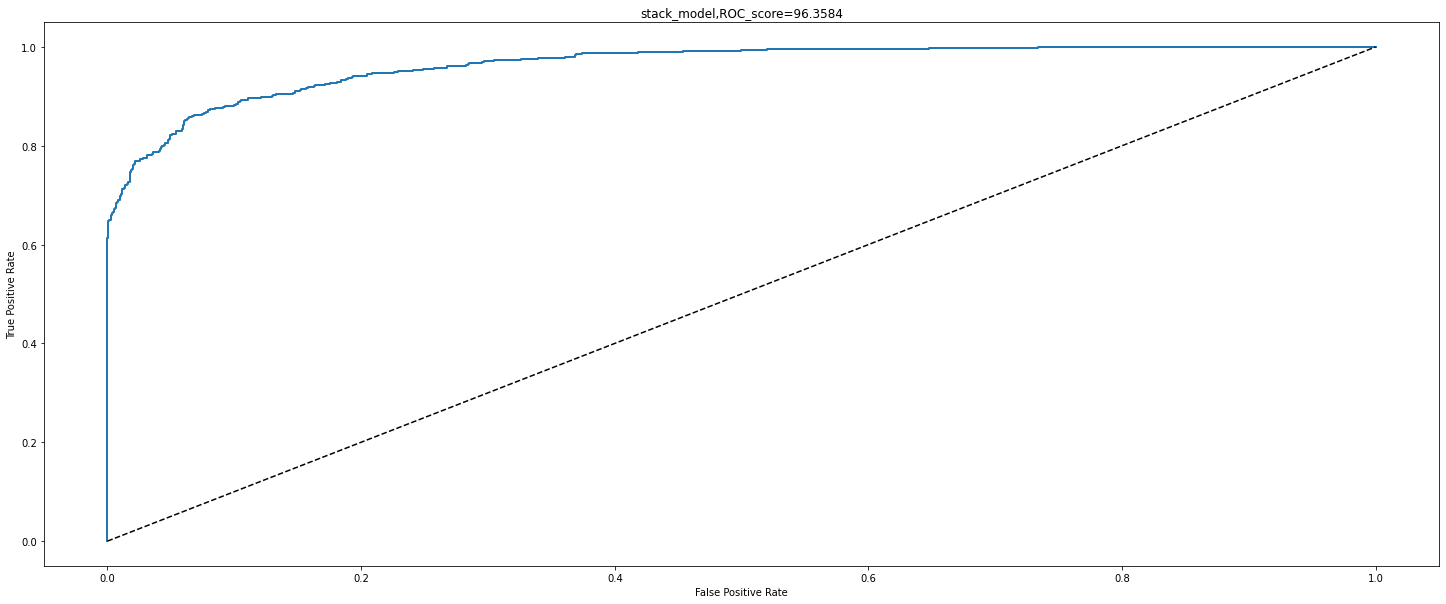

In [352]:
plt.figure(figsize=(25,10))
fpr,tpr,thresholds=metrics.roc_curve(y_test,ypred_proba_stack)
score=metrics.roc_auc_score(y_test,ypred_proba_stack)
ax=plt.plot(fpr,tpr,linewidth=2)
ax=plt.plot([0,1],[0,1],'k--')
plt.title(f'{str(key)},ROC_score={round(score*100,4)}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

#Conclusion
Stacking model has the highest f1_score =83% which is the best generilzation for the data and ROC_AUC score=96.358